<a href="https://colab.research.google.com/github/alvin0727/TugasBesar_MachineLearning/blob/main/Tugas_Besar_Machine_Learning_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=54c2d0a99f309ea4864f619d5aee8e309b5aa000fdb67f5ccd9c018b1d6b5337
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [ ]:
pip install ucimlrepo

#Tugas Besar Machine Learning 1
#Kelompok : Princess Irulan
#Anggota :  
```
1120005 - Nathanael Alvin
1120022 - Ricardo Koswara
1120029 - Marchen Immanuel Sinatrawan
1120048 - Vito Vandersen
1121028 - David Kharis Elio M.
1121031 - Jonathan Senjaya
1121061 - Alvin Boys Gea
1121062 - Vincent Benedict Mars
```
#Dataset : **Bank Marketing**
##Penjelasan Dataset
Dataset yang kami gunakan adalah dataset Bank Marketing. Dataset tersebut terkait dengan Campaign Pemasaran dari lembaga perbankan Portugis. Campaign pemasaran itu didasarkan pada panggilan telepon.

Dataset tersebut diambil dari UC Irvine Machine Learning Repository:

https://archive.ics.uci.edu/dataset/222/bank+marketing

##Import Library

In [ ]:
# import Library

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd # analisis data
import numpy as np # Operasi matematika, statistik & matriks
import matplotlib.pyplot as plt # visualisasi data
from matplotlib import gridspec
import seaborn as sns # Visualisasi data lebih menarik dari pyplot
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from scipy import stats
from scipy.stats.mstats import normaltest
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from ydata_profiling import ProfileReport

Mounted at /content/drive


##Import Dataset

In [ ]:
# import dataset
bank_marketing = pd.read_csv("/content/drive/MyDrive/bank-full.csv", sep=';')

In [ ]:
# Bank Marketing teratas
bank_marketing.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

###Overview

Informasi Umum: Dataset terdiri dari beberapa kolom seperti '**age**' (usia), '**job**' (pekerjaan), '**marital**' (status pernikahan), '**education**' (pendidikan), '**balance**' (saldo), '**housing**' (pinjaman rumah), '**loan**' (pinjaman pribadi), '**contact**' (kontak), '**day**' (hari), '**month**' (bulan), '**duration**' (durasi panggilan), '**campaign**' (jumlah kontak dalam kampanye ini), '**pdays**' (jumlah hari sejak kontak sebelumnya), '**previous**' (jumlah kontak sebelumnya), '**poutcome**' (hasil dari kampanye pemasaran sebelumnya), dan '**y**' (variabel target).

##Pandas Profiling

Pandas profiling merupakan salah satu cara yang sangat efisien untuk melakukan analisis data.

In [ ]:
profile = ProfileReport(bank_marketing, title="Profiling Report")

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

###Data Understanding

Kumpulan data berisi informasi tentang tele-marketing campaign dari lembaga perbankan Portugis. Tujuan dari kampanye ini adalah untuk mendorong klien mereka untuk berlangganan financial product tertentu (Term Deposit). Setelah setiap panggilan, klien ditanyai niat mereka untuk subscribe produk (successful campaign) atau tidak (unsuccessful campaign).

Kumpulan data memiliki 45.211 instances panggilan ke klien (baris) dan 17 variabel(kolom)

* Beberapa Fitur ada yang tidak seimbang (Default, loan, y)
* Beberapa Fitur tipe numerik memiliki distribusi yang cukup Skewed: duration, campaign, pdays, previous.

In [ ]:
bank_marketing.describe(include="all").head()

age          job  marital  education default       balance  \
count   45211.00000        45211    45211      45211   45211  45211.000000   
unique          NaN           12        3          4       2           NaN   
top             NaN  blue-collar  married  secondary      no           NaN   
freq            NaN         9732    27214      23202   44396           NaN   
mean       40.93621          NaN      NaN        NaN     NaN   1362.272058   

       housing   loan   contact           day  month     duration  \
count    45211  45211     45211  45211.000000  45211  45211.00000   
unique       2      2         3           NaN     12          NaN   
top        yes     no  cellular           NaN    may          NaN   
freq     25130  37967     29285           NaN  13766          NaN   
mean       NaN    NaN       NaN     15.806419    NaN    258.16308   

            campaign         pdays      previous poutcome      y  
count   45211.000000  45211.000000  45211.000000    45211  45211  
unique           NaN           NaN           NaN        4      2  
top              NaN           NaN           NaN  unknown     no  
freq             NaN           NaN           NaN    36959  39922  
mean        2.763841     40.197828      0.580323      NaN    NaN

In [ ]:
bank_marketing.head(50)

age            job   marital  education default  balance housing loan  \
0    58     management   married   tertiary      no     2143     yes   no   
1    44     technician    single  secondary      no       29     yes   no   
2    33   entrepreneur   married  secondary      no        2     yes  yes   
3    47    blue-collar   married    unknown      no     1506     yes   no   
4    33        unknown    single    unknown      no        1      no   no   
5    35     management   married   tertiary      no      231     yes   no   
6    28     management    single   tertiary      no      447     yes  yes   
7    42   entrepreneur  divorced   tertiary     yes        2     yes   no   
8    58        retired   married    primary      no      121     yes   no   
9    43     technician    single  secondary      no      593     yes   no   
10   41         admin.  divorced  secondary      no      270     yes   no   
11   29         admin.    single  secondary      no      390     yes   no   
12   53     technician   married  secondary      no        6     yes   no   
13   58     technician   married    unknown      no       71     yes   no   
14   57       services   married  secondary      no      162     yes   no   
15   51        retired   married    primary      no      229     yes   no   
16   45         admin.    single    unknown      no       13     yes   no   
17   57    blue-collar   married    primary      no       52     yes   no   
18   60        retired   married    primary      no       60     yes   no   
19   33       services   married  secondary      no        0     yes   no   
20   28    blue-collar   married  secondary      no      723     yes  yes   
21   56     management   married   tertiary      no      779     yes   no   
22   32    blue-collar    single    primary      no       23     yes  yes   
23   25       services   married  secondary      no       50     yes   no   
24   40        retired   married    primary      no        0     yes  yes   
25   44         admin.   married  secondary      no     -372     yes   no   
26   39     management    single   tertiary      no      255     yes   no   
27   52   entrepreneur   married  secondary      no      113     yes  yes   
28   46     management    single  secondary      no     -246     yes   no   
29   36     technician    single  secondary      no      265     yes  yes   
30   57     technician   married  secondary      no      839      no  yes   
31   49     management   married   tertiary      no      378     yes   no   
32   60         admin.   married  secondary      no       39     yes  yes   
33   59    blue-collar   married  secondary      no        0     yes   no   
34   51     management   married   tertiary      no    10635     yes   no   
35   57     technician  divorced  secondary      no       63     yes   no   
36   25    blue-collar   married  secondary      no       -7     yes   no   
37   53     technician   married  secondary      no       -3      no   no   
38   36         admin.  divorced  secondary      no      506     yes   no   
39   37         admin.    single  secondary      no        0     yes   no   
40   44       services  divorced  secondary      no     2586     yes   no   
41   50     management   married  secondary      no       49     yes   no   
42   60    blue-collar   married    unknown      no      104     yes   no   
43   54        retired   married  secondary      no      529     yes   no   
44   58        retired   married    unknown      no       96     yes   no   
45   36         admin.    single    primary      no     -171     yes   no   
46   58  self-employed   married   tertiary      no     -364     yes   no   
47   44     technician   married  secondary      no        0     yes   no   
48   55     technician  divorced  secondary      no        0      no   no   
49   29     management    single   tertiary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0

In [ ]:
print('Number of rows: ' + str(bank_marketing.shape[0]) + '. Number of columns: ' + str(bank_marketing.shape[1]))

Number of rows: 45211. Number of columns: 17


In [ ]:
bank_marketing.dtypes.value_counts()

object    10
int64      7
Name: count, dtype: int64

Kumpulan data berisi **45.211 data dengan 17 atribut: 10 tipe objek (termasuk variabel Target) dan 7 tipe numerik**

In [ ]:
bank_marketing.describe(include='all').T

count unique          top   freq         mean          std  \
age        45211.0    NaN          NaN    NaN     40.93621    10.618762   
job          45211     12  blue-collar   9732          NaN          NaN   
marital      45211      3      married  27214          NaN          NaN   
education    45211      4    secondary  23202          NaN          NaN   
default      45211      2           no  44396          NaN          NaN   
balance    45211.0    NaN          NaN    NaN  1362.272058  3044.765829   
housing      45211      2          yes  25130          NaN          NaN   
loan         45211      2           no  37967          NaN          NaN   
contact      45211      3     cellular  29285          NaN          NaN   
day        45211.0    NaN          NaN    NaN    15.806419     8.322476   
month        45211     12          may  13766          NaN          NaN   
duration   45211.0    NaN          NaN    NaN    258.16308   257.527812   
campaign   45211.0    NaN          NaN    NaN     2.763841     3.098021   
pdays      45211.0    NaN          NaN    NaN    40.197828   100.128746   
previous   45211.0    NaN          NaN    NaN     0.580323     2.303441   
poutcome     45211      4      unknown  36959          NaN          NaN   
y            45211      2           no  39922          NaN          NaN   

              min    25%    50%     75%       max  
age          18.0   33.0   39.0    48.0      95.0  
job           NaN    NaN    NaN     NaN       NaN  
marital       NaN    NaN    NaN     NaN       NaN  
education     NaN    NaN    NaN     NaN       NaN  
default       NaN    NaN    NaN     NaN       NaN  
balance   -8019.0   72.0  448.0  1428.0  102127.0  
housing       NaN    NaN    NaN     NaN       NaN  
loan          NaN    NaN    NaN     NaN       NaN  
contact       NaN    NaN    NaN     NaN       NaN  
day           1.0    8.0   16.0    21.0      31.0  
month         NaN    NaN    NaN     NaN       NaN  
duration      0.0  103.0  180.0   319.0    4918.0  
campaign      1.0    1.0    2.0     3.0      63.0  
pdays        -1.0   -1.0   -1.0    -1.0     871.0  
previous      0.0    0.0    0.0     0.0     275.0  
poutcome      NaN    NaN    NaN     NaN       NaN  
y             NaN    NaN    NaN     NaN       NaN

Variabel dapat dibagi menjadi beberapa kelompok berikut:
1. Variabel terkait pelanggan:
 * age: usia klien (range: 17 - 98)
 * job: jenis pekerjaan klien (12 categories)
 * marital: status pernikahan (4 categories: 'married', 'single', 'divorced', 'unknown')
 * education: tingkat pendidikan (4 categories: 'tertiary', 'secondary', 'unknown', 'primary')
 * default: jika klien memiliki kredit Macet (3 categories: 'no', 'unknown', 'yes')
 * balance: saldo klien
 * housing: jika klien memiliki Pinjaman rumah (3 categories: 'no', 'unknown', 'yes')
 * loan: jika klien memiliki pinjaman pribadi (3 categories: 'no', 'yes')

2. Variabel yang terkait dengan kontak terakhir (current campaign):
 * contact: jenis komunikasi (3 categories: 'telephone', 'unknown', 'cellular')
 * day: hari terakhir dikontak dalam 1 bulan
 * month: bulan kontak terakhir (12 categories: 'jan', 'feb', 'mar', 'apr',
 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec')
 * duration: durasi panggilan, dalam hitungan detik (more than 1 hour)

3. Variabel terkait marketing lainnya:
 * campaign : Jumlah kontak yang dilakukan terhadap 1 klien selama campaign
 * pdays: jumlah hari dari kontak terakhir
 * previous: jumlah kontak yang dilakukan sebelum campaign
 * poutcome: hasil dari kampanye pemasaran sebelumnya (4 categories: 'unknown', 'failure', 'other', 'success')

5. Target variable:
 * y: apakah pelanggan subscribe ke produk (2 categories: 'yes', 'no').

In [ ]:
bank_marketing.y.value_counts(normalize=True)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

**Fitur Target sangat tidak seimbang dengan hampir 89% pelanggan tidak subscribe** produk.

##Data Cleaning

###Duplicates

In [ ]:
print('Number of duplicates in the dataset: ', sum(bank_marketing.duplicated()))

Number of duplicates in the dataset:  0


###Missing Values

In [ ]:
for column in bank_marketing.columns:
    print(column.capitalize() + ' - Missing Values: ' + str(sum(bank_marketing[column].isnull())))

Age - Missing Values: 0
Job - Missing Values: 0
Marital - Missing Values: 0
Education - Missing Values: 0
Default - Missing Values: 0
Balance - Missing Values: 0
Housing - Missing Values: 0
Loan - Missing Values: 0
Contact - Missing Values: 0
Day - Missing Values: 0
Month - Missing Values: 0
Duration - Missing Values: 0
Campaign - Missing Values: 0
Pdays - Missing Values: 0
Previous - Missing Values: 0
Poutcome - Missing Values: 0
Y - Missing Values: 0


Tidak ada Missing Value

###Outlier and Distribution Analysis.

Kami membuat fungsi untuk memvisualisasikan both Boxplots and Histogram plots dari variabel tipe numerik, untuk memeriksa kemungkinan outliers dan Fiture distributions; Kami, kemudian, membuat fungsi untuk mengetahui "No-outlier region", jumlah outliers, dan persentase outliers, menggunakan metode Interquartile Range.

####Age

<ipython-input-17-ea6b38233511>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_marketing[attribute], ax=ax2)


age - Data is not normally distributed.


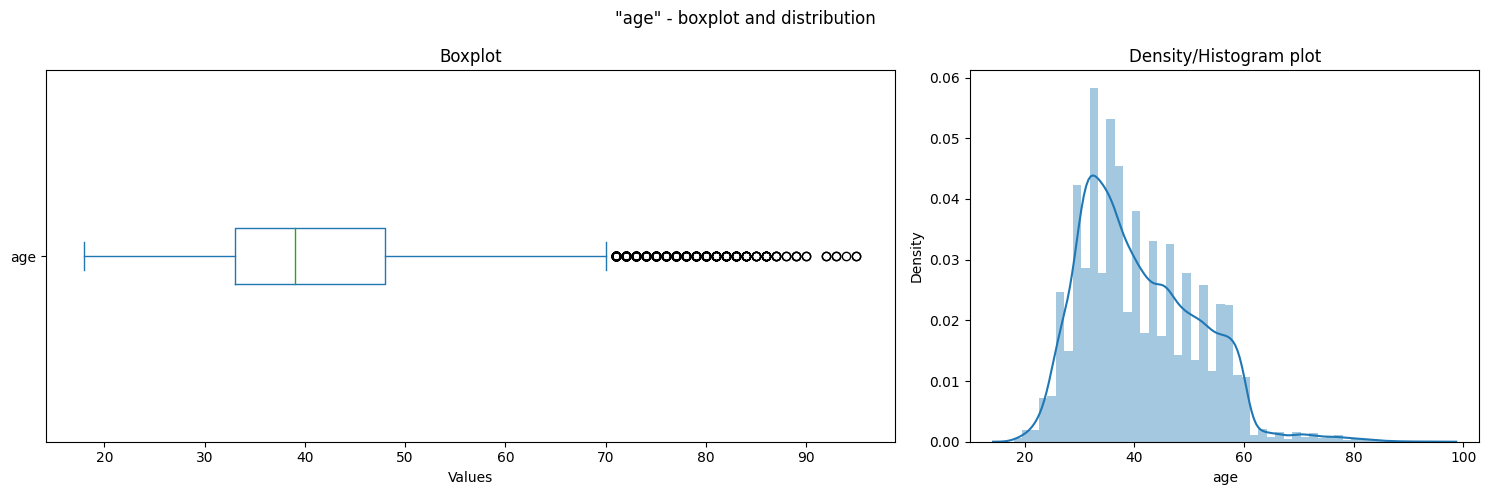

In [ ]:
# visualize boxplot and distribution of numeric-type variables
def box_dist_plot(attribute, fig_size=(15,5), fig_ratio=[2.5,1.5], box_vert=False):
    plt.figure(figsize=fig_size)
    gs = gridspec.GridSpec(1, 2, width_ratios=fig_ratio)
    ax1 = plt.subplot(gs[0])
    bank_marketing[attribute].plot(kind='box', vert=box_vert, ax=ax1)
    ax1.set(title='Boxplot', xlabel='Values')
    ax2 = plt.subplot(gs[1])
    sns.distplot(bank_marketing[attribute], ax=ax2)
    ax2.set(title='Density/Histogram plot')
    plt.suptitle('"{}" - boxplot and distribution'.format(attribute))
    plt.tight_layout()

# let's define a function for normal test distribution
def norm_test(attribute):
    test_st, p_value = normaltest(bank_marketing[attribute].values)
    if p_value <= 0.05:
        print('{} - Data is not normally distributed.'.format(attribute))
    else:
        print('{} - Data is normally distributed.'.format(attribute))

box_dist_plot('age')
norm_test('age')

In [ ]:
def outlier_detector(attribute):
    q25, q50, q75 = np.percentile(bank_marketing[attribute], [25,50,75])
    iqr = q75 - q25
    min_lim = round(q25 - 1.5*iqr, 1)
    max_lim = round(q75 + 1.5*iqr, 1)
    if bank_marketing[attribute].min() > min_lim and bank_marketing[attribute].max() < max_lim:
        print(str(attribute) + ' attribute - no outlier region: ' + str(bank_marketing[attribute].min()) + ' - ' + str(bank_marketing[attribute].max()) + '.')
    elif bank_marketing[attribute].min() > min_lim:
        print(str(attribute) + ' attribute - no outlier region: ' + str(bank_marketing[attribute].min()) + ' - ' + str(max_lim) + '.')
    elif bank_marketing[attribute].max() < max_lim:
        print(str(attribute) + ' attribute - no outlier region: ' + str(min_lim) + ' - ' + str(bank_marketing[attribute].max()) + '.')
    else:
        print(str(attribute) + ' attribute - no outlier region: ' + str(min_lim) + ' - ' + str(max_lim) + '.')
    global outlier_list
    outlier_list = []
    for x in bank_marketing[attribute]:
        if x < min_lim or x > max_lim:
            outlier_list.append(x)
    print('Number of outliers: ' + str(len(outlier_list)))
    print('Percentage of outliers: ' + str(round(len(outlier_list)/bank_marketing.shape[0]*100,2)) + '%.')
    print('First ten outliers:', outlier_list[0:10])

outlier_detector('age')

age attribute - no outlier region: 18 - 70.5.
Number of outliers: 487
Percentage of outliers: 1.08%.
First ten outliers: [83, 75, 75, 83, 75, 72, 71, 76, 83, 71]


####balance

<ipython-input-17-ea6b38233511>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_marketing[attribute], ax=ax2)


balance - Data is not normally distributed.


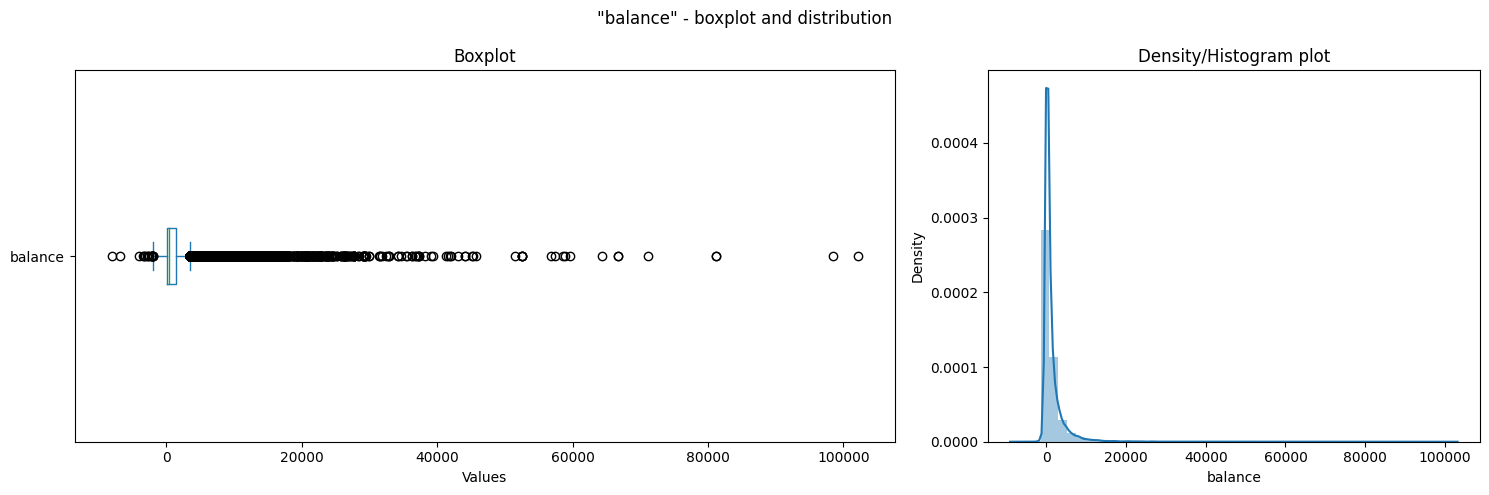

In [ ]:
box_dist_plot('balance')
norm_test('balance')

In [ ]:
outlier_detector('balance')

balance attribute - no outlier region: -1962.0 - 3462.0.
Number of outliers: 4729
Percentage of outliers: 10.46%.
First ten outliers: [10635, 6530, 12223, 5935, 4384, 4080, 5699, 24598, 8486, 8730]


####day

<ipython-input-17-ea6b38233511>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_marketing[attribute], ax=ax2)


day - Data is not normally distributed.


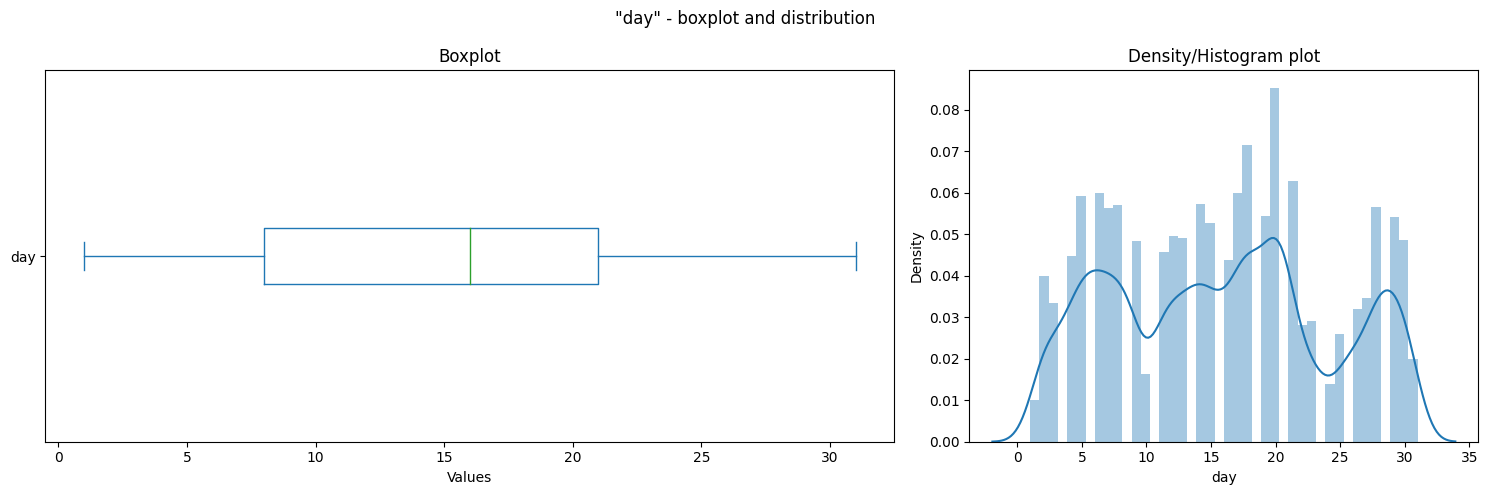

In [ ]:
box_dist_plot('day')
norm_test('day')

In [ ]:
outlier_detector('day')

day attribute - no outlier region: 1 - 31.
Number of outliers: 0
Percentage of outliers: 0.0%.
First ten outliers: []


####duration

<ipython-input-17-ea6b38233511>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_marketing[attribute], ax=ax2)


duration - Data is not normally distributed.


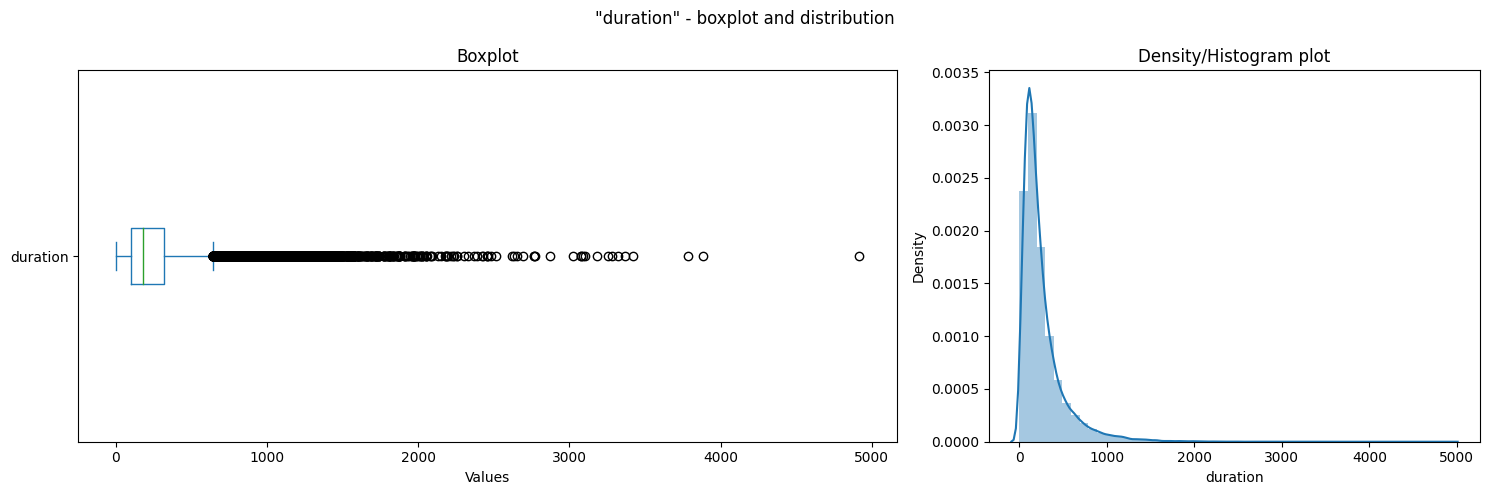

In [ ]:
box_dist_plot('duration')
norm_test('duration')

In [ ]:
outlier_detector('duration')

duration attribute - no outlier region: 0 - 643.0.
Number of outliers: 3235
Percentage of outliers: 7.16%.
First ten outliers: [1666, 1492, 787, 1778, 812, 1042, 1467, 1389, 849, 677]


####campaign

<ipython-input-17-ea6b38233511>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_marketing[attribute], ax=ax2)


campaign - Data is not normally distributed.


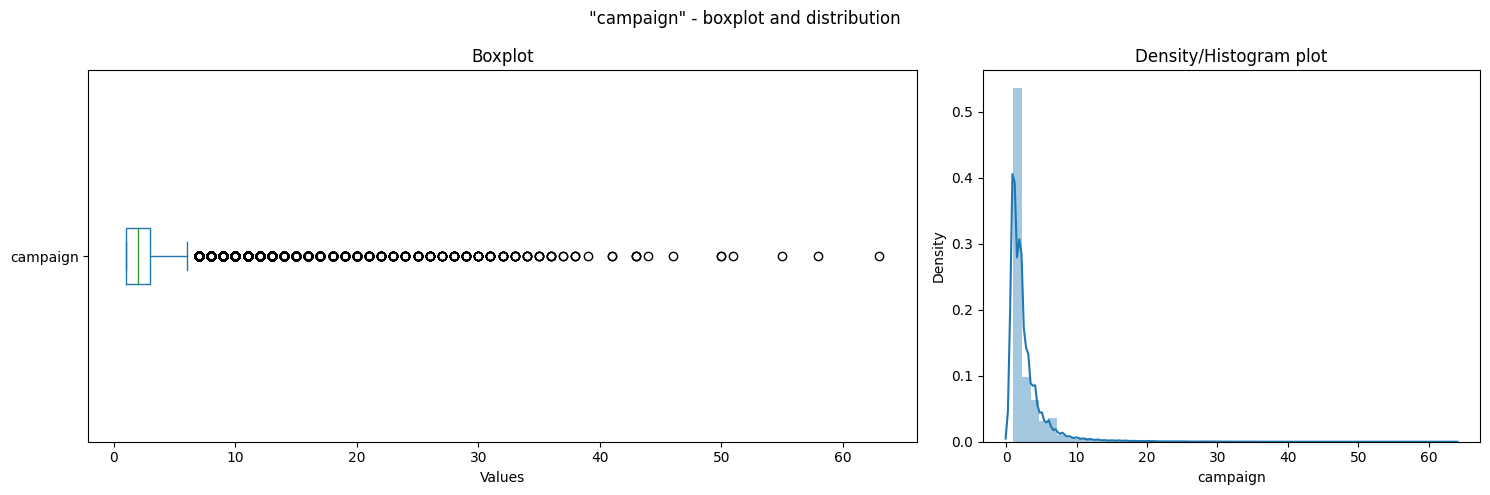

In [ ]:
box_dist_plot('campaign')
norm_test('campaign')

In [ ]:
outlier_detector('campaign')

campaign attribute - no outlier region: 1 - 6.0.
Number of outliers: 3064
Percentage of outliers: 6.78%.
First ten outliers: [7, 8, 7, 8, 7, 8, 7, 7, 9, 9]


####pdays

<ipython-input-17-ea6b38233511>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_marketing[attribute], ax=ax2)


pdays - Data is not normally distributed.


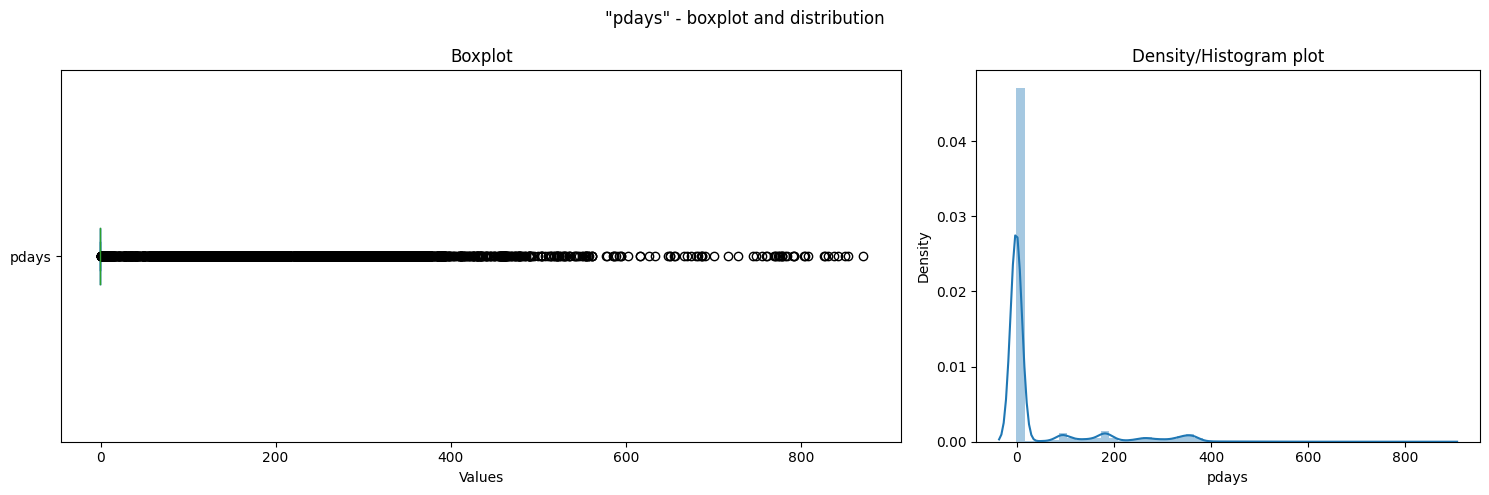

In [ ]:
box_dist_plot('pdays')
norm_test('pdays')

In [ ]:
outlier_detector('pdays')

pdays attribute - no outlier region: -1.0 - -1.0.
Number of outliers: 8257
Percentage of outliers: 18.26%.
First ten outliers: [151, 166, 91, 86, 143, 147, 89, 140, 176, 101]


####previous

<ipython-input-17-ea6b38233511>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_marketing[attribute], ax=ax2)


previous - Data is not normally distributed.


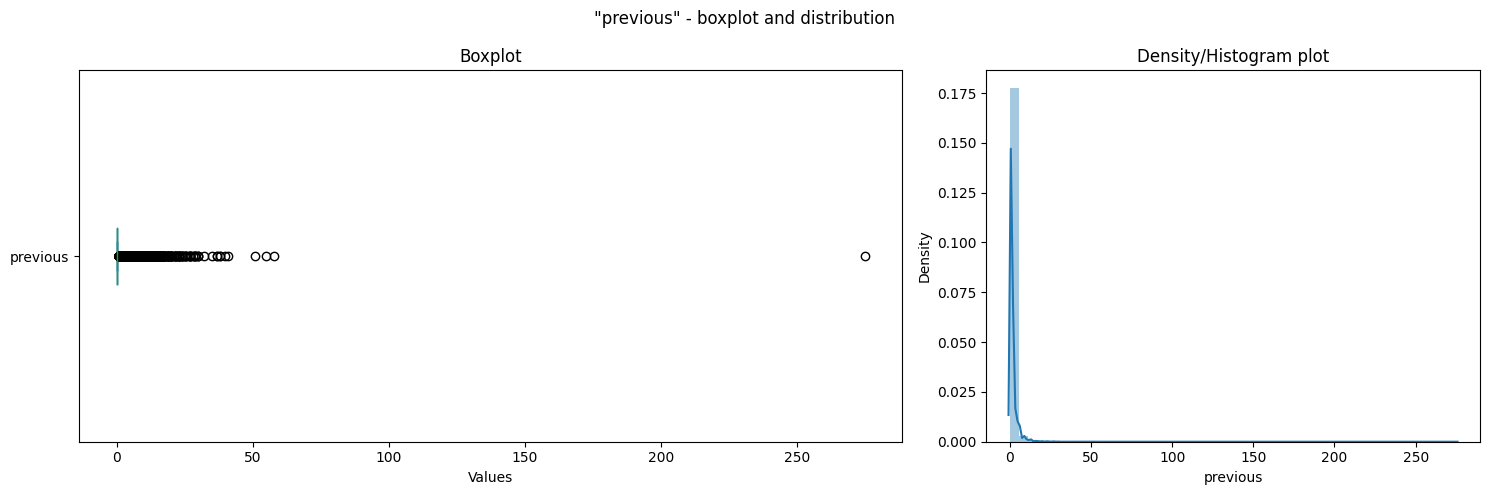

In [ ]:
box_dist_plot('previous')
norm_test('previous')

In [ ]:
outlier_detector('previous')

previous attribute - no outlier region: 0.0 - 0.0.
Number of outliers: 8257
Percentage of outliers: 18.26%.
First ten outliers: [3, 1, 4, 4, 3, 2, 2, 4, 1, 11]


####drop outliers

In [ ]:
q = bank_marketing['age'].quantile(0.95)
bank_marketing_no_outliers_age = bank_marketing[bank_marketing['age'] < q]

In [ ]:
q1 = bank_marketing_no_outliers_age['balance'].quantile(0.25)
q2 = bank_marketing_no_outliers_age['balance'].quantile(0.70)
q1

68.0

In [ ]:
q2

1077.0

In [ ]:
iqr = q2 - q1
lower_bound = 0
upper_bound = q2 + 1.5 * iqr
upper_bound

2590.5

In [ ]:
bank_marketing_no_outliers_balance = bank_marketing_no_outliers_age.loc[(bank_marketing_no_outliers_age['balance'] > lower_bound) & (bank_marketing_no_outliers_age['balance'] < upper_bound)]

In [ ]:
q = bank_marketing_no_outliers_balance['duration'].quantile(0.94)
bank_marketing_no_outliers_duration = bank_marketing_no_outliers_balance[bank_marketing_no_outliers_balance['duration'] < q]

In [ ]:
q = bank_marketing_no_outliers_duration['campaign'].quantile(0.995)
bank_marketing_no_outliers_campaign = bank_marketing_no_outliers_duration[bank_marketing_no_outliers_duration['campaign'] < q]

In [ ]:
q = bank_marketing_no_outliers_campaign['pdays'].quantile(0.994)
bank_marketing_no_outliers_pdays = bank_marketing_no_outliers_campaign[bank_marketing_no_outliers_campaign['pdays'] < q]

In [ ]:
bank_marketing_no_outliers_previous = bank_marketing_no_outliers_pdays.loc[(bank_marketing_no_outliers_pdays['previous'] > 0) & (bank_marketing_no_outliers_pdays['previous'] < 200)]

<ipython-input-40-ec98d814561a>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_marketing_no_outliers_previous[attribute], ax=ax2)


age - Data is not normally distributed.


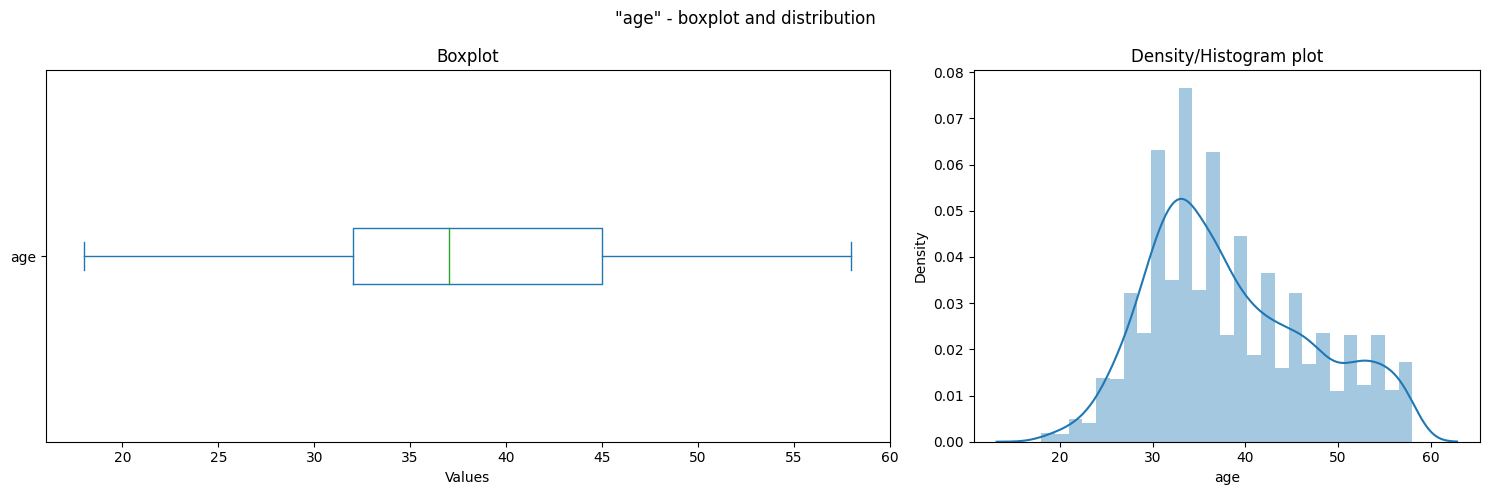

In [ ]:
# visualize boxplot and distribution of numeric-type variables
def box_dist_plot(attribute, fig_size=(15,5), fig_ratio=[2.5,1.5], box_vert=False):
    plt.figure(figsize=fig_size)
    gs = gridspec.GridSpec(1, 2, width_ratios=fig_ratio)
    ax1 = plt.subplot(gs[0])
    bank_marketing_no_outliers_previous[attribute].plot(kind='box', vert=box_vert, ax=ax1)
    ax1.set(title='Boxplot', xlabel='Values')
    ax2 = plt.subplot(gs[1])
    sns.distplot(bank_marketing_no_outliers_previous[attribute], ax=ax2)
    ax2.set(title='Density/Histogram plot')
    plt.suptitle('"{}" - boxplot and distribution'.format(attribute))
    plt.tight_layout()

# let's define a function for normal test distribution
def norm_test(attribute):
    test_st, p_value = normaltest(bank_marketing_no_outliers_previous[attribute].values)
    if p_value <= 0.05:
        print('{} - Data is not normally distributed.'.format(attribute))
    else:
        print('{} - Data is normally distributed.'.format(attribute))

box_dist_plot('age')
norm_test('age')

<ipython-input-40-ec98d814561a>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_marketing_no_outliers_previous[attribute], ax=ax2)


balance - Data is not normally distributed.


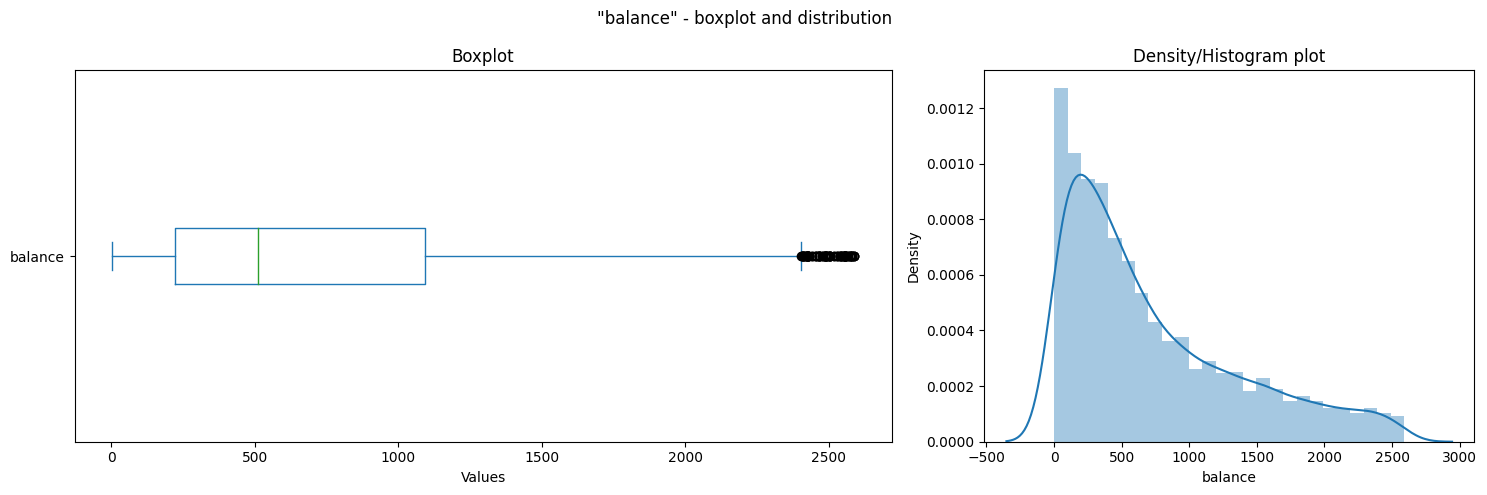

In [ ]:
box_dist_plot('balance')
norm_test('balance')

<ipython-input-40-ec98d814561a>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_marketing_no_outliers_previous[attribute], ax=ax2)


day - Data is not normally distributed.


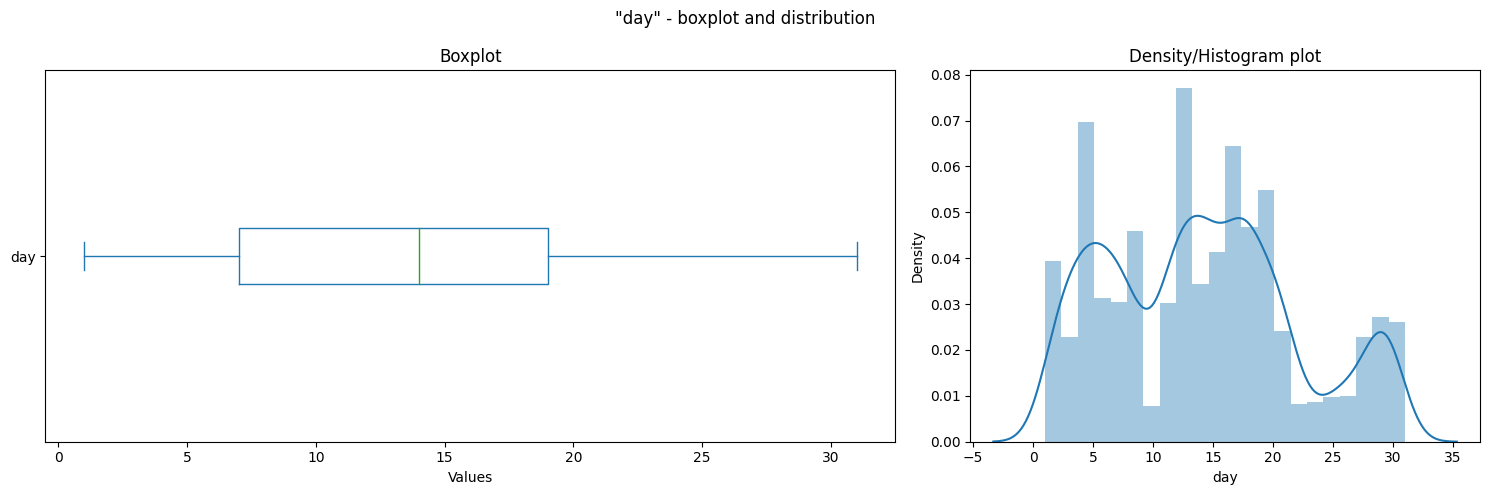

In [ ]:
box_dist_plot('day')
norm_test('day')

<ipython-input-40-ec98d814561a>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_marketing_no_outliers_previous[attribute], ax=ax2)


duration - Data is not normally distributed.


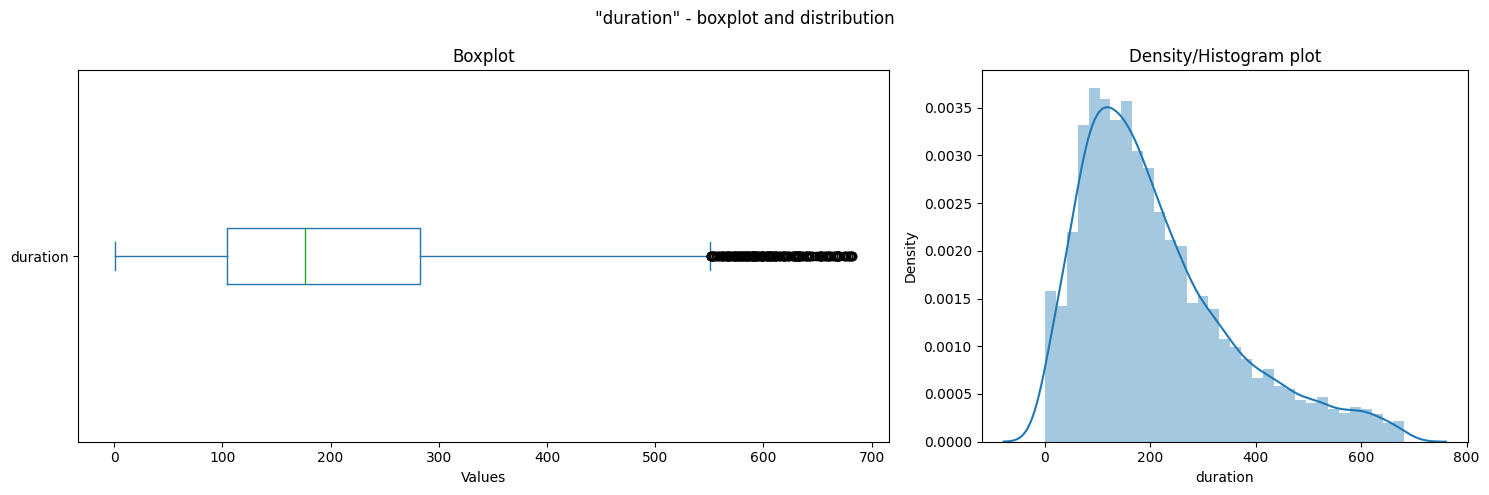

In [ ]:
box_dist_plot('duration')
norm_test('duration')

<ipython-input-40-ec98d814561a>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_marketing_no_outliers_previous[attribute], ax=ax2)


campaign - Data is not normally distributed.


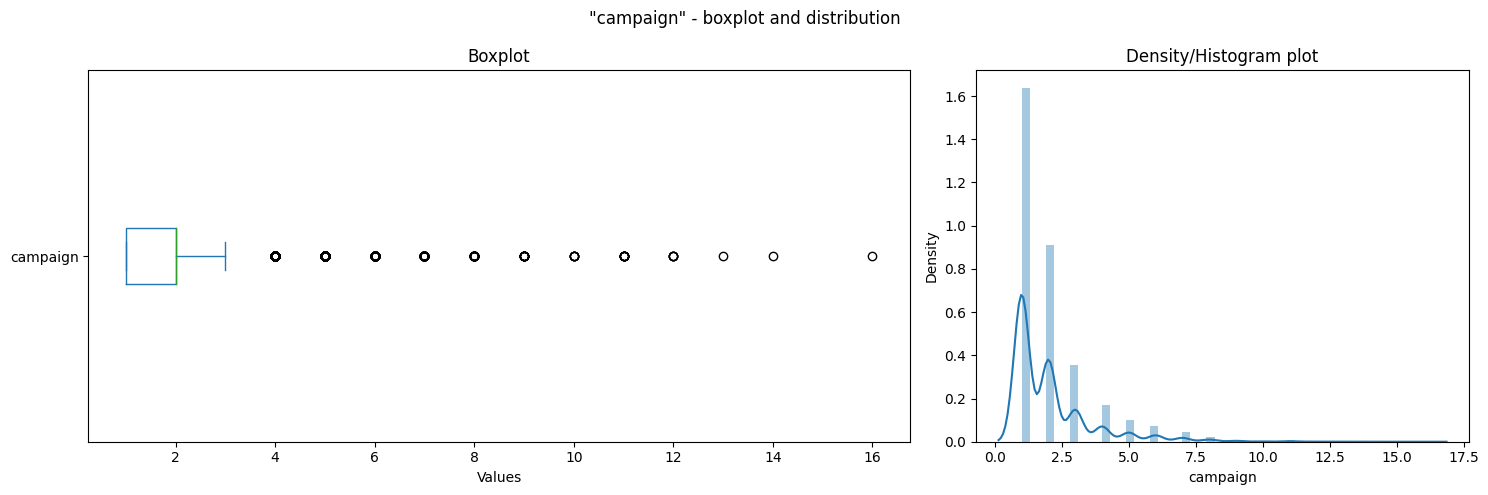

In [ ]:
box_dist_plot('campaign')
norm_test('campaign')

<ipython-input-40-ec98d814561a>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_marketing_no_outliers_previous[attribute], ax=ax2)


pdays - Data is not normally distributed.


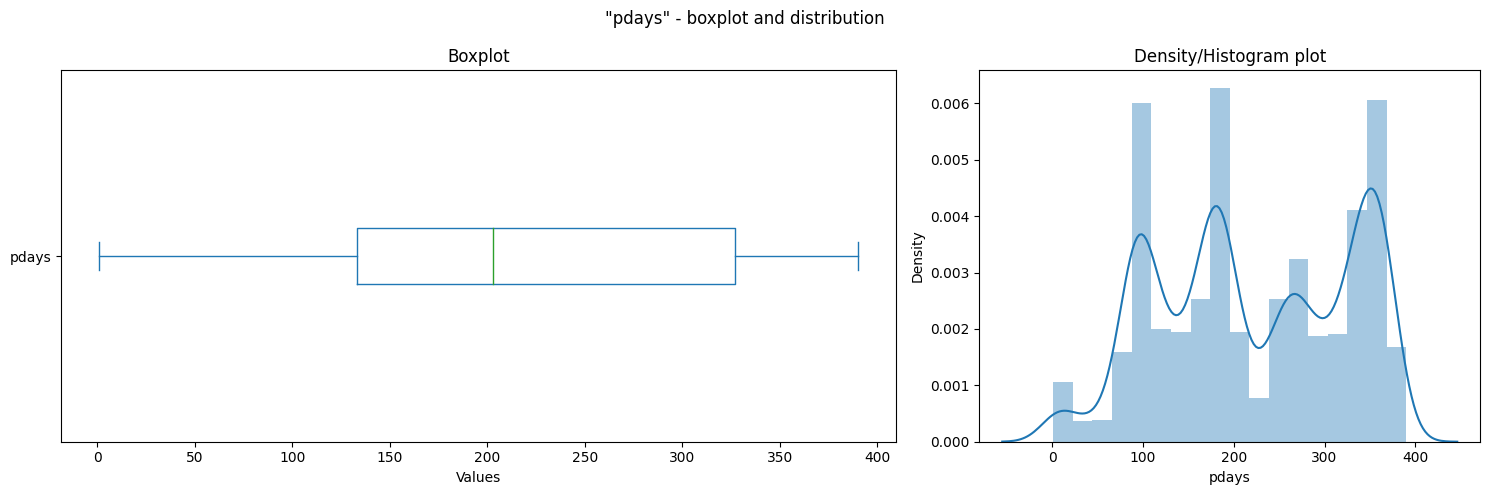

In [ ]:
box_dist_plot('pdays')
norm_test('pdays')

<ipython-input-40-ec98d814561a>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_marketing_no_outliers_previous[attribute], ax=ax2)


previous - Data is not normally distributed.


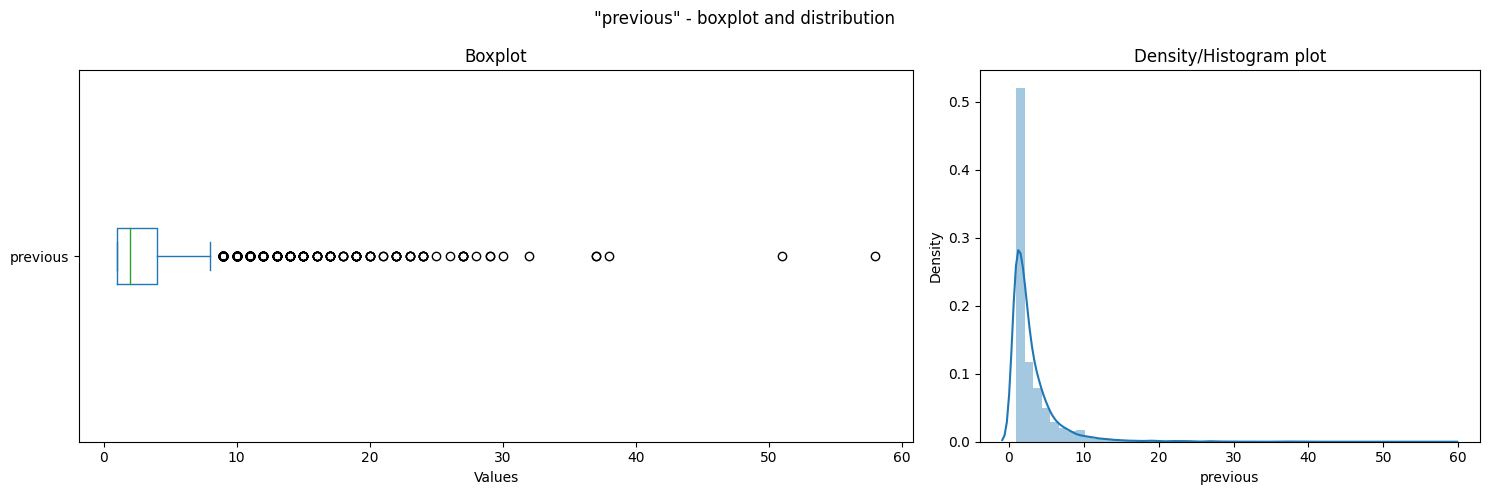

In [ ]:
box_dist_plot('previous')
norm_test('previous')

####Data Cleaned

In [ ]:
data_cleaned = bank_marketing_no_outliers_previous

In [ ]:
data_cleaned.describe(include="all")

age          job  marital  education default      balance  \
count   5061.000000         5061     5061       5061    5061  5061.000000   
unique          NaN           12        3          4       2          NaN   
top             NaN  blue-collar  married  secondary      no          NaN   
freq            NaN         1084     2739       2740    5047          NaN   
mean      38.371863          NaN      NaN        NaN     NaN   728.472436   
std        8.819267          NaN      NaN        NaN     NaN   649.004850   
min       18.000000          NaN      NaN        NaN     NaN     1.000000   
25%       32.000000          NaN      NaN        NaN     NaN   221.000000   
50%       37.000000          NaN      NaN        NaN     NaN   511.000000   
75%       45.000000          NaN      NaN        NaN     NaN  1094.000000   
max       58.000000          NaN      NaN        NaN     NaN  2590.000000   

       housing  loan   contact          day month     duration     campaign  \
count     5061  5061      5061  5061.000000  5061  5061.000000  5061.000000   
unique       2     2         3          NaN    12          NaN          NaN   
top        yes    no  cellular          NaN   may          NaN          NaN   
freq      3346  4348      4703          NaN  1660          NaN          NaN   
mean       NaN   NaN       NaN    14.066390   NaN   211.253112     2.060067   
std        NaN   NaN       NaN     7.905615   NaN   144.496731     1.585117   
min        NaN   NaN       NaN     1.000000   NaN     1.000000     1.000000   
25%        NaN   NaN       NaN     7.000000   NaN   104.000000     1.000000   
50%        NaN   NaN       NaN    14.000000   NaN   176.000000     2.000000   
75%        NaN   NaN       NaN    19.000000   NaN   283.000000     2.000000   
max        NaN   NaN       NaN    31.000000   NaN   682.000000    16.000000   

              pdays     previous poutcome     y  
count   5061.000000  5061.000000     5061  5061  
unique          NaN          NaN        4     2  
top             NaN          NaN  failure    no  
freq            NaN          NaN     3045  4135  
mean     221.631101     3.129619      NaN   NaN  
std      103.260862     3.418821      NaN   NaN  
min        1.000000     1.000000      NaN   NaN  
25%      133.000000     1.000000      NaN   NaN  
50%      203.000000     2.000000      NaN   NaN  
75%      327.000000     4.000000      NaN   NaN  
max      390.000000    58.000000      NaN   NaN

##Visualisasi Setelah Data Cleaned

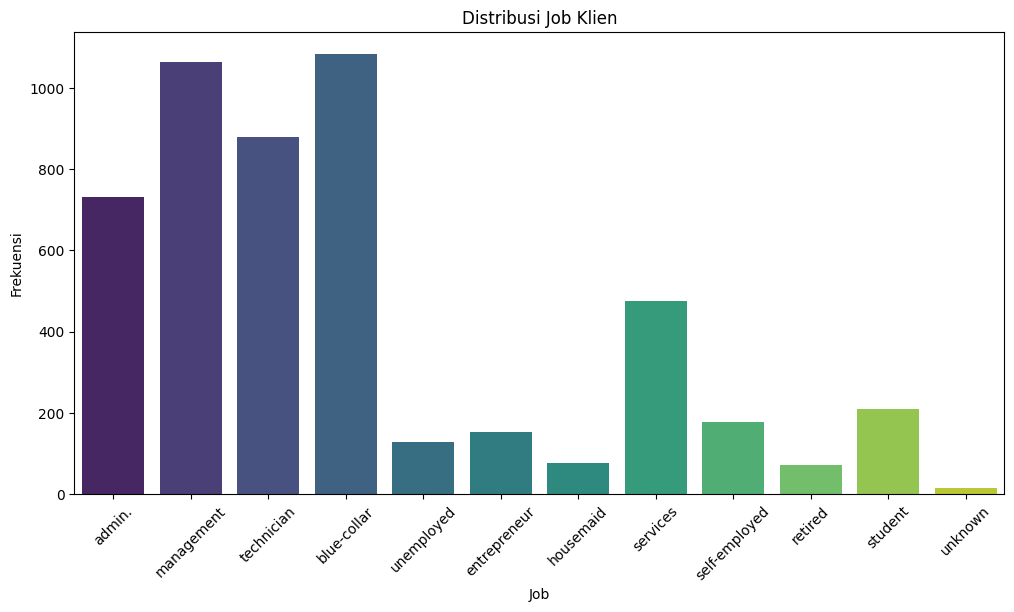

In [ ]:
# Visualisasi frekuensi dalam fitur kategorikal 'job'
plt.figure(figsize=(12, 6))
sns.countplot(data=data_cleaned, x='job', palette='viridis')
plt.xlabel('Job')
plt.ylabel('Frekuensi')
plt.title('Distribusi Job Klien')
plt.xticks(rotation=45)
plt.show()

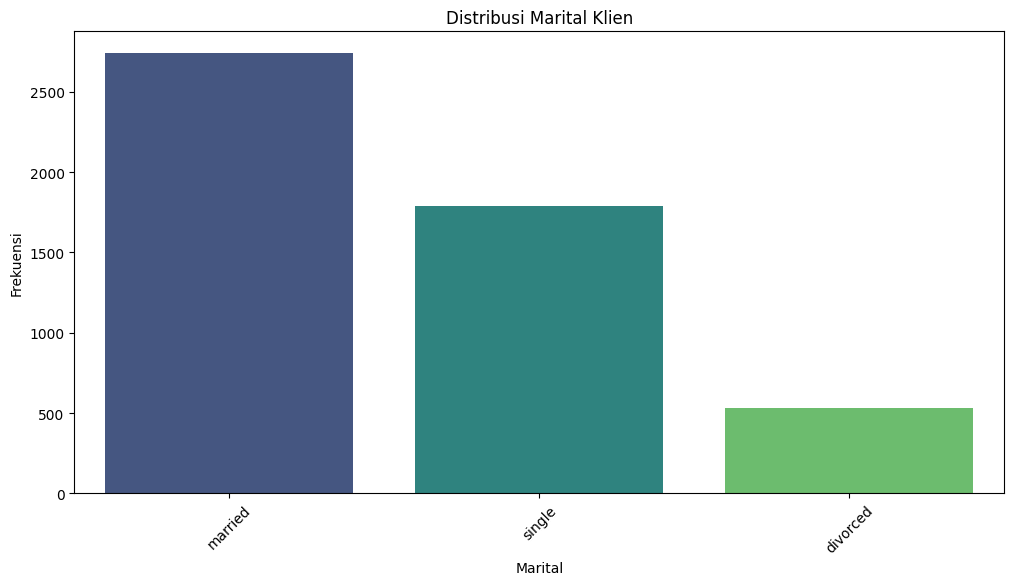

In [ ]:
# Visualisasi frekuensi dalam fitur kategorikal 'job'
plt.figure(figsize=(12, 6))
sns.countplot(data=data_cleaned, x='marital', palette='viridis')
plt.xlabel('Marital')
plt.ylabel('Frekuensi')
plt.title('Distribusi Marital Klien')
plt.xticks(rotation=45)
plt.show()

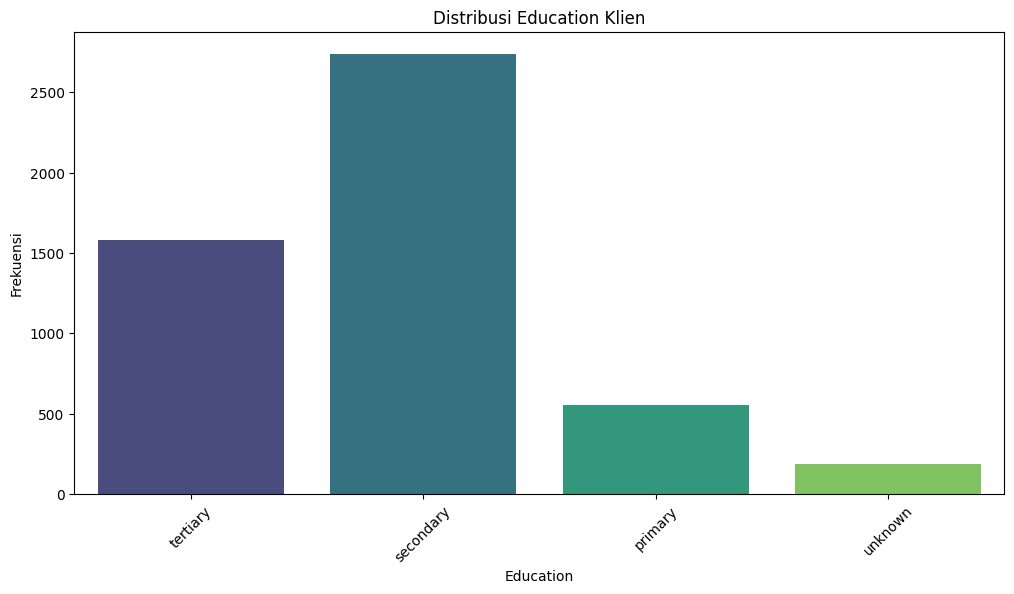

In [ ]:
# Visualisasi frekuensi dalam fitur kategorikal 'job'
plt.figure(figsize=(12, 6))
sns.countplot(data=data_cleaned, x='education', palette='viridis')
plt.xlabel('Education')
plt.ylabel('Frekuensi')
plt.title('Distribusi Education Klien')
plt.xticks(rotation=45)
plt.show()

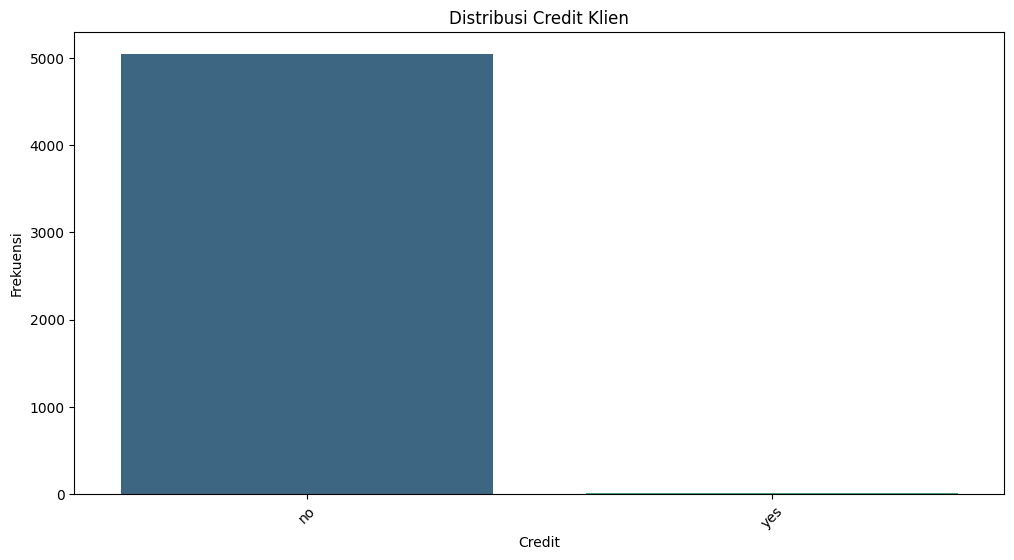

In [ ]:
# Visualisasi frekuensi dalam fitur kategorikal 'job'
plt.figure(figsize=(12, 6))
sns.countplot(data=data_cleaned, x='default', palette='viridis')
plt.xlabel('Credit')
plt.ylabel('Frekuensi')
plt.title('Distribusi Credit Klien')
plt.xticks(rotation=45)
plt.show()

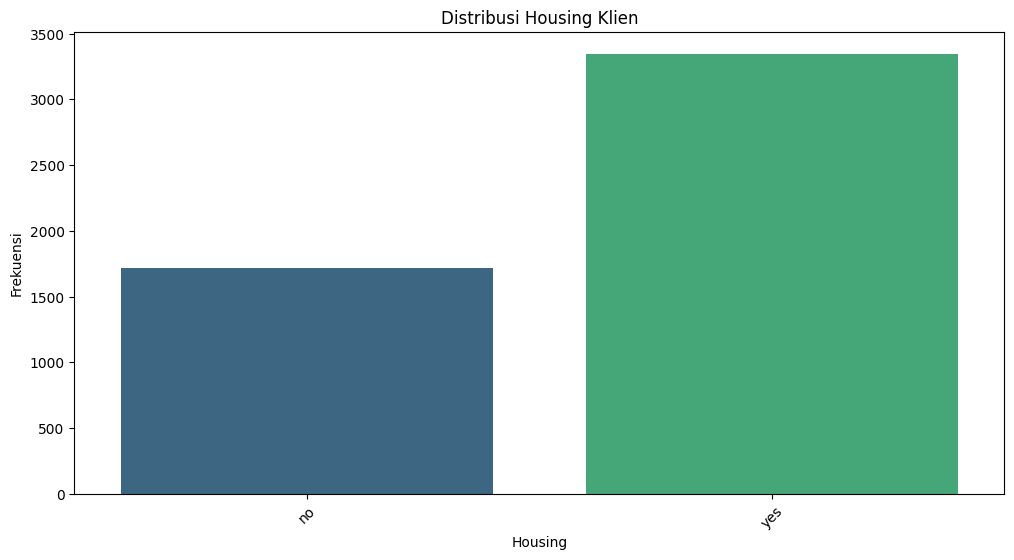

In [ ]:
# Visualisasi frekuensi dalam fitur kategorikal 'job'
plt.figure(figsize=(12, 6))
sns.countplot(data=data_cleaned, x='housing', palette='viridis')
plt.xlabel('Housing')
plt.ylabel('Frekuensi')
plt.title('Distribusi Housing Klien')
plt.xticks(rotation=45)
plt.show()

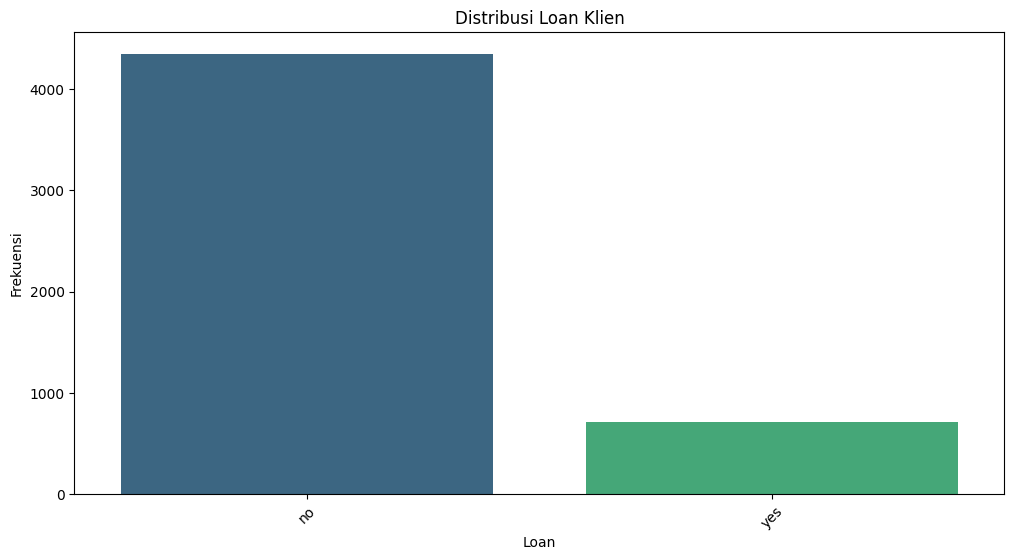

In [ ]:
# Visualisasi frekuensi dalam fitur kategorikal 'job'
plt.figure(figsize=(12, 6))
sns.countplot(data=data_cleaned, x='loan', palette='viridis')
plt.xlabel('Loan')
plt.ylabel('Frekuensi')
plt.title('Distribusi Loan Klien')
plt.xticks(rotation=45)
plt.show()

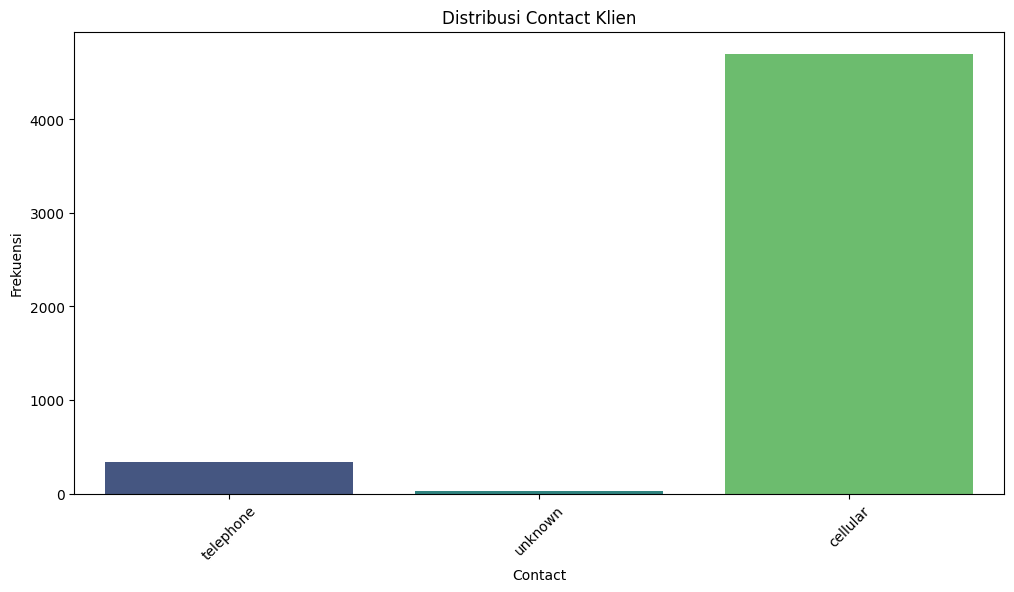

In [ ]:
# Visualisasi frekuensi dalam fitur kategorikal 'job'
plt.figure(figsize=(12, 6))
sns.countplot(data=data_cleaned, x='contact', palette='viridis')
plt.xlabel('Contact')
plt.ylabel('Frekuensi')
plt.title('Distribusi Contact Klien')
plt.xticks(rotation=45)
plt.show()

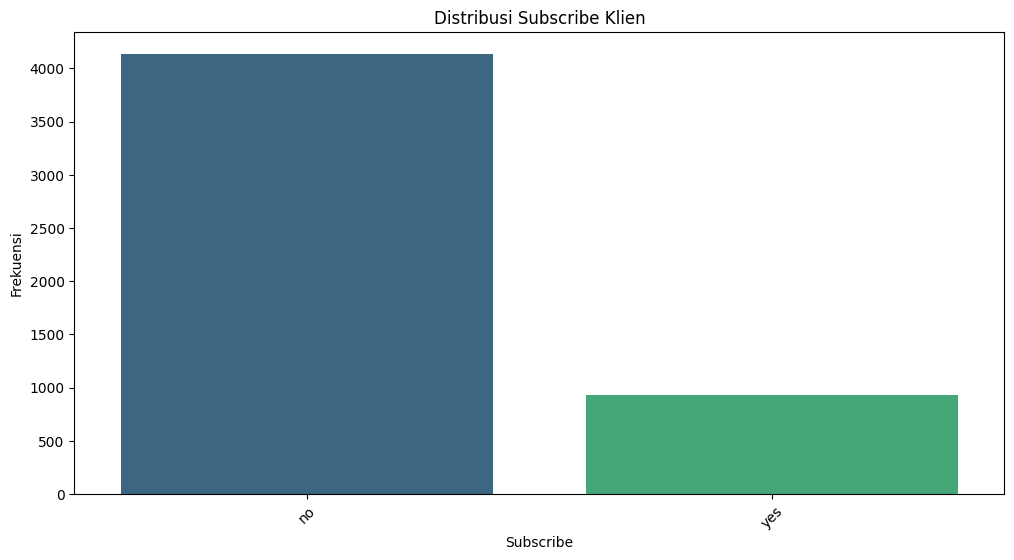

In [ ]:
# Visualisasi frekuensi dalam fitur kategorikal 'job'
plt.figure(figsize=(12, 6))
sns.countplot(data=data_cleaned, x='y', palette='viridis')
plt.xlabel('Subscribe')
plt.ylabel('Frekuensi')
plt.title('Distribusi Subscribe Klien')
plt.xticks(rotation=45)
plt.show()

##Convert

In [ ]:
job_mapping = {
    'management': 1,
    'technician': 2,
    'entrepreneur': 3,
    'blue-collar': 4,
    'unknown': 5,
    'retired': 6,
    'admin.': 7,
    'services': 8,
    'self-employed': 9,
    'unemployed': 10,
    'housemaid': 11,
    'student': 12
}

# Replace the categories in the 'job' column with numerical values
data_cleaned['job'] = data_cleaned['job'].replace(job_mapping)

<ipython-input-57-3445f2309258>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['job'] = data_cleaned['job'].replace(job_mapping)


In [ ]:
marital_mapping = {
    'married': 1, 'single': 2, 'divorced': 3
}
data_cleaned['marital'] = data_cleaned['marital'].replace(marital_mapping)

<ipython-input-58-0c3d18e9c04d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['marital'] = data_cleaned['marital'].replace(marital_mapping)


In [ ]:
education_mapping ={
    'tertiary': 1, 'secondary': 2, 'unknown': 3, 'primary': 4
}
data_cleaned['education'] = data_cleaned['education'].replace(education_mapping)

<ipython-input-59-a9444188aaa0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['education'] = data_cleaned['education'].replace(education_mapping)


In [ ]:
default_mapping = {
    'yes': 1, 'no': 0
}
data_cleaned['default'] = data_cleaned['default'].replace(default_mapping)

<ipython-input-60-7a7d876827e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['default'] = data_cleaned['default'].replace(default_mapping)


In [ ]:
housing_mapping = {
    'yes': 1, 'no': 0
}
data_cleaned['housing'] = data_cleaned['housing'].replace(housing_mapping)

<ipython-input-61-b227b493cf7a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['housing'] = data_cleaned['housing'].replace(housing_mapping)


In [ ]:
loan_mapping = {
    'yes': 1, 'no': 0
}
data_cleaned['loan'] = data_cleaned['loan'].replace(loan_mapping)

<ipython-input-62-e1abaa0deeba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['loan'] = data_cleaned['loan'].replace(loan_mapping)


In [ ]:
contact_mapping = {
    'unknown': 0,
    'telephone': 1,
    'cellular': 2
}

# Replace the categories in the 'job' column with numerical values
data_cleaned['contact'] = data_cleaned['contact'].replace(contact_mapping)

<ipython-input-63-fa216f1baf41>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['contact'] = data_cleaned['contact'].replace(contact_mapping)


In [ ]:
month_mapping = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

# Replace the categories in the 'job' column with numerical values
data_cleaned['month'] = data_cleaned['month'].replace(month_mapping)

<ipython-input-64-76d1105f935c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['month'] = data_cleaned['month'].replace(month_mapping)


In [ ]:
poutcome_mapping = {
    'unknown': 0, 'failure': 2, 'other': 3, 'success': 1
}
data_cleaned['poutcome'] = data_cleaned['poutcome'].replace(poutcome_mapping)

<ipython-input-65-dc6e33e41a71>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['poutcome'] = data_cleaned['poutcome'].replace(poutcome_mapping)


In [ ]:
y_mapping = {
    'yes': 1, 'no': 0
}
data_cleaned['y'] = data_cleaned['y'].replace(y_mapping)

<ipython-input-66-8f0dada3ea2e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['y'] = data_cleaned['y'].replace(y_mapping)


##Menentukan Prediksi

Kami akan melakukan Klasifikasi, Goalnya adalah untuk memprediksi apakah Klien akan **subscribe** "ya atau tidak" deposito berjangka "fitur y". Algoritma yang akan digunakan adalah **Support Vector Machine**.

###Mengapa prediksi itu penting dilakukan :
Deposito Berjangka adalah produk keuangan yang memberikan keuntungan bagi bank, dengan melakukan prediksi tersebut, bank dapat
* Punya Target Kampanye pemasaran mereka dengan lebih efektif
* Memberikan penawaran yang tepat kepada klien yang potensial
* Dapat meningkatkan jumlah klien yang berlangganan
hal itu dapat meningkatkan profitabilitas bank secara keseluruhan

Lalu depsito berjangka adalah produk yang tak cocok untuk semua klien, jadi bank dapat
* menghindari penawaran produk yang tak sesuai ke klien
* meningkatkan kepuasan pelanggan

Lalu deposito berjangka punya risiko tertentu, misalnya risiko gagal bayar, sehingga bank dapat
* menilai kelayakan kredit terhadap klien
* menetapkan tingkat bunga yang sesuai terhadap klien
* kelola risiko gagal bayar dengan efektif

##Feature Transformation

###Combining Age & Default Feature

Kombinasi ini menunjukkan bahwa orang yang memiliki berumur 30 keatas serta sudah menikah itu lebih cenderung fokus kerja nyata dibandingkan ikut deposito atau bahkan memang masih awam dalam dunia deposito

In [ ]:
data_y_1 = data_cleaned[(data_cleaned['age'] > 30) &
                             (data_cleaned['default'] == 0) &
                            (data_cleaned['marital'] == 1) &
                             (data_cleaned['y'] == 0)]
jumlah_data = data_y_1.shape[0]

print(f"Jumlah data yang memenuhi kondisi adalah: {jumlah_data}")

Jumlah data yang memenuhi kondisi adalah: 2101


kita bisa melihat bahwa ada 2100 data yang tidak melakukan deposito, yang memiliki umur diatas 30 dan data yang ada tersebut itu hampir 50%

In [ ]:
data_cleaned1 = data_cleaned.copy()
data_cleaned1['age_default_combined'] = ((data_cleaned['age'] > 30) & (data_cleaned['default'] == 0) & (data_cleaned['marital'] == 1) & (data_cleaned['y'] == 0)).astype(int)
data_cleaned1 = data_cleaned1.reindex(columns=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'age_default_combined', 'y'])

Disini kita mengcombine age dan default sesuai ketentuan dimana:
- Age > 30
- Default = 0(no)
- Marital = 1(Marriege)

In [ ]:
data_cleaned1.head(25)

age  job  marital  education  default  balance  housing  loan  contact  \
24060   33    7        1          1        0      882        0     0        1   
24072   36    1        1          1        0     2415        1     0        1   
24080   56    2        1          2        0      589        1     0        0   
24086   44    4        1          2        0     1324        1     0        1   
24122   26    2        2          1        0      172        0     1        1   
24136   34    1        1          1        0     1770        1     0        0   
24151   33   10        3          2        0     1005        1     0        1   
24160   34    7        1          1        0      899        1     0        0   
24165   30    7        1          2        0      873        1     0        1   
24170   30    1        2          1        0     1243        1     0        1   
24184   44    3        1          1        0     1631        1     0        2   
24186   51    1        3          1        0      119        0     0        2   
24187   51    2        1          2        0       58        1     0        2   
24198   34    2        2          2        0      105        1     0        2   
24203   49    1        1          1        0     1533        0     0        2   
24207   47   11        1          1        0      228        1     0        2   
24208   40    1        2          2        0     1623        1     0        2   
24230   47    4        1          2        0     1484        0     0        2   
24234   38    1        1          1        0      494        0     0        2   
24236   54    2        2          2        0      198        1     1        2   
24238   52    1        1          1        0     1701        1     1        2   
24239   48    7        3          2        0      295        1     0        2   
24250   45    2        1          2        0     1477        1     0        2   
24253   39    7        1          2        0      401        1     0        2   
24264   49    1        1          1        0       64        0     0        2   

       day  month  duration  campaign  pdays  previous  poutcome  \
24060   21     10        39         1    151         3         2   
24072   22     10        73         1     86         4         3   
24080   23     10       518         1    147         2         1   
24086   25     10       119         1     89         2         3   
24122    4     11        21         1    140         4         3   
24136    6     11        26         1    101        11         3   
24151   10     11       175         1    174         2         2   
24160   12     11       114         1    170         3         2   
24165   12     11       119         1    167         3         1   
24170   13     11        86         1    174         1         2   
24184   17     11        81         1    195         2         2   
24186   17     11       200         1    165         2         2   
24187   17     11        79         1    129         2         2   
24198   17     11       303         1    196         2         2   
24203   17     11       324         1    172         1         2   
24207   17     11        80         1    118         1         2   
24208   17     11       161         1    167         2         2   
24230   17     11       297         1    119         3         2   
24234   17     11       146         1    104         2         3   
24236   17     11       120         1    171         2         2   
24238   17     11       381         1    117         2         3   
24239   17     11       123         1    164         2         1   
24250   17     11        75         1    132         1         2   
24253   17     11       396         1    129         2         2   
24264   17     11       208         1    159         1         1   

       age_default_combined  y  
24060                     1  0  
24072                     1  0  
24080                     0  1  

Dan hasil data dari feature combinenya akan memberikan angka 1 jika semua kondisi terpenuhi dan 0 jika tidak

##Memilih Feature Selection

###Using Sequential Feature Selection

Feature Selection adalah proses mengidentifikasi dan memilih fitur yang paling relevan dari kumpulan data untuk tugas pemodelan prediktif tertentu. Hal ini dapat dilakukan karena berbagai alasan, seperti untuk meningkatkan akurasi prediktif suatu model, untuk mengurangi kompleksitas komputasi suatu model, atau untuk membuat model lebih dapat diinterpretasikan.

Sequential feature selection adalah greedy algorithm yang secara berulang memilih fitur terbaik dari kumpulan data untuk meningkatkan kinerja model prediktif.

Maka kami menggunakan Sequential feature selection untuk Feature Selection.

In [ ]:
data_cleaned_before_Feature_selection = data_cleaned1

In [ ]:
X = data_cleaned1.drop(["y"],axis=1)
# X = data_cleaned1
y = data_cleaned1['y']

# Create a logistic regression model
logreg = LogisticRegression(max_iter=6000)

# Create a sequential feature selector(model, n_features_to_select, scoring)
selector = SequentialFeatureSelector(logreg, n_features_to_select=5, scoring='accuracy')

# Fit the selector to the data
selector.fit(X, y)

# Get the selected features
selected_features = selector.get_support()

scores_features = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
print(f'Scores selected features: {scores_features}')
print('The selected features are:', list(X.columns[selected_features]))

Scores selected features: [0.87956565 0.9041502  0.9229249  0.91205534 0.77371542]
The selected features are: ['age', 'default', 'contact', 'poutcome', 'age_default_combined']


##Klasifikasi

###Support Vector Machine

Kita akan memprediksi apakah Klien akan subscribe "ya atau tidak" deposito berjangka "fitur y".

Fitur target : fitur y

5 Fitur yang paling berpengaruh :  
['age', 'default', 'contact', 'poutcome', 'age_default_combined']

Maka kami hanya pakai fitur yang paling berpengaruh saja dalam

In [ ]:
data_cleared_for_classification = data_cleaned1[['age', 'default', 'contact', 'poutcome', 'age_default_combined', 'y']]
data_cleared_for_classification

age  default  contact  poutcome  age_default_combined  y
24060   33        0        1         2                     1  0
24072   36        0        1         3                     1  0
24080   56        0        0         1                     0  1
24086   44        0        1         3                     1  0
24122   26        0        1         3                     0  0
...    ...      ...      ...       ...                   ... ..
45182   34        0        2         1                     0  1
45189   25        0        2         2                     0  0
45190   32        0        2         1                     0  1
45193   28        0        2         1                     0  1
45201   53        0        2         1                     0  1

[5061 rows x 6 columns]

In [ ]:
X = data_cleared_for_classification.drop(["y"],axis=1)
y = data_cleared_for_classification['y']

####Support Vector Machine with Feature Selection (5 features)

In [ ]:
# Membagi data menjadi set latihan dan validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

# Penjelasan
# Baris ini membagi data (fitur X dan label target y) menjadi set train dan validasi.
# Fungsi `train_test_split` dari scikit-learn digunakan untuk tujuan ini.
# Argumen:
#   X: Fitur independen dari dataset.
#   y: Label target dari dataset.
#   test_size: Proporsi data yang akan digunakan dalam set validasi (default 0.25). Di sini, diatur ke 0.3 (30%).
#   random_state: Mengatur seed acak untuk membagi data guna memastikan reprodusibilitas (opsional). Di sini, diatur ke 42.

# Mendefinisikan model SVM dengan kernel linear (implisit untuk SVM standar)
svm = SVC()  # Argumen kernel tidak diperlukan untuk SVM standar

# Melakukan grid_search dengan Cross Validation (ganti cv dengan nilai yang sesuai) -> untuk mengatasi masalah waktu dan overfitting dalam pencarian grid.
param_grid = {'C': [1, 5, 10]}  # Hyperparameter C untuk SVM standar
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Penjelasan
# Blok ini melakukan pencarian grid dengan validasi silang untuk menemukan nilai hyperparameter terbaik untuk model SVM.
#   - `GridSearchCV`: Class ini dari scikit-learn digunakan untuk pencarian grid.
#     - `svm`: Objek SVC yang dibuat sebelumnya diteruskan sebagai estimator yang akan disetel.
#     - `param_grid`: Dictionary yang menentukan hyperparameter (C) untuk dicari, dengan daftar nilai.
#                     Di sini, kita mencari nilai terbaik dari parameter regularisasi (C), yang mengontrol trade-off
#                     antara kompleksitas model dan kesalahan pelatihan. Kami mencoba nilai 1, 5, dan 10.
#     - `cv`: Jumlah fold untuk validasi silang (default 5). Di sini, diatur ke 5, artinya data pelatihan akan
#             dibagi menjadi 5 fold untuk pemasangan dan evaluasi model berulang.
#   - `grid_search.fit(X_train, y_train)`: Baris ini menyesuaikan pencarian grid pada data pelatihan. Ini melatih model SVM
#                                        dengan nilai C berbeda pada setiap fold validasi silang dan mengevaluasi kinerjanya.

# Print nilai parameter terbaik dan akurasi pada set validasi
print("Nilai C terbaik: ", grid_search.best_params_['C'])
y_pred = grid_search.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Akurasi validasi: ", accuracy)

# Penjelasn
#   - `grid_search.best_params_['C']`: Ini mencetak nilai terbaik dari parameter C yang ditemukan oleh pencarian grid.
#   - `y_pred = grid_search.predict(X_val)`: Baris ini memprediksi label kelas untuk data validasi menggunakan model
#                                          SVM terbaik yang diidentifikasi oleh pencarian grid.
#   - `accuracy = accuracy_score(y_val, y_pred)`: Ini menghitung skor akurasi (persentase prediksi yang benar) pada set validasi.
#   - `print("Akurasi validasi: ", accuracy)`: Ini mencetak skor akurasi model terbaik pada set validasi. Akurasi ini
#                                               berfungsi sebagai perkiraan seberapa baik model dapat bekerja pada data yang tidak terlihat.

precision_svm1 = precision_score(y_val, y_pred)
print("Precision: ", precision_svm1)
recall_svm1 = recall_score(y_val, y_pred)
print("Recall: ", recall_svm1)
f1_svm1 = f1_score(y_val, y_pred)
print("F1-Score: ", f1_svm1)
roc_auc_svm1 = roc_auc_score(y_val, y_pred)
print("ROC AUC: ", roc_auc_svm1)

Nilai C terbaik:  10
Akurasi validasi:  0.8768926925608953
Precision:  0.6933962264150944
Recall:  0.5464684014869888
F1-Score:  0.6112266112266113
ROC AUC:  0.7472342007434944



* Nilai Precision untuk menekan false positive. Dalam kasus ini, 69% dari semua yang diprediksi sebagai "akan subscribe" benar-benar "subscribe".

* Nilai Recall untuk menekan false negative. Dalam kasus ini, model mengidentifikasi 54% dari semua instance "akan subscribe" dengan benar.

* Nilai F1-Score merupakan keseimbangan antara Precision dan Recall. Nilai F1-Score 61% menunjukkan bahwa model memiliki keseimbangan yang baik antara Precision dan Recall.

* Nilai ROC AUC menunjukkan kemampuan model untuk membedakan antara kelas positif dan negatif. Nilai ROC AUC 74% menunjukkan bahwa model mampu membedakan antara "akan subscribe" dan "tidak akan subscribe" dengan cukup baik.

####Support Vector Machine without Feature Selection (17 Features)

In [ ]:
X = data_cleaned_before_Feature_selection.drop(["y"],axis=1)
y = data_cleaned_before_Feature_selection['y']

In [ ]:
# Membagi data menjadi set latihan dan validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

# Penjelasan
# Baris ini membagi data (fitur X dan label target y) menjadi set train dan validasi.
# Fungsi `train_test_split` dari scikit-learn digunakan untuk tujuan ini.
# Argumen:
#   X: Fitur independen dari dataset.
#   y: Label target dari dataset.
#   test_size: Proporsi data yang akan digunakan dalam set validasi (default 0.25). Di sini, diatur ke 0.3 (30%).
#   random_state: Mengatur seed acak untuk membagi data guna memastikan reprodusibilitas (opsional). Di sini, diatur ke 42.

# Mendefinisikan model SVM dengan kernel linear (implisit untuk SVM standar)
svm = SVC()  # Argumen kernel tidak diperlukan untuk SVM standar

# Melakukan grid_search dengan Cross Validation (ganti cv dengan nilai yang sesuai) -> untuk mengatasi masalah waktu dan overfitting dalam pencarian grid.
param_grid = {'C': [1, 5, 10]}  # Hyperparameter C untuk SVM standar
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Penjelasan
# Blok ini melakukan pencarian grid dengan validasi silang untuk menemukan nilai hyperparameter terbaik untuk model SVM.
#   - `GridSearchCV`: Class ini dari scikit-learn digunakan untuk pencarian grid.
#     - `svm`: Objek SVC yang dibuat sebelumnya diteruskan sebagai estimator yang akan disetel.
#     - `param_grid`: Dictionary yang menentukan hyperparameter (C) untuk dicari, dengan daftar nilai.
#                     Di sini, kita mencari nilai terbaik dari parameter regularisasi (C), yang mengontrol trade-off
#                     antara kompleksitas model dan kesalahan pelatihan. Kami mencoba nilai 1, 5, dan 10.
#     - `cv`: Jumlah fold untuk validasi silang (default 5). Di sini, diatur ke 5, artinya data pelatihan akan
#             dibagi menjadi 5 fold untuk pemasangan dan evaluasi model berulang.
#   - `grid_search.fit(X_train, y_train)`: Baris ini menyesuaikan pencarian grid pada data pelatihan. Ini melatih model SVM
#                                        dengan nilai C berbeda pada setiap fold validasi silang dan mengevaluasi kinerjanya.

# Print nilai parameter terbaik dan akurasi pada set validasi
print("Nilai C terbaik: ", grid_search.best_params_['C'])
y_pred = grid_search.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Akurasi validasi: ", accuracy)

# Penjelasn
#   - `grid_search.best_params_['C']`: Ini mencetak nilai terbaik dari parameter C yang ditemukan oleh pencarian grid.
#   - `y_pred = grid_search.predict(X_val)`: Baris ini memprediksi label kelas untuk data validasi menggunakan model
#                                          SVM terbaik yang diidentifikasi oleh pencarian grid.
#   - `accuracy = accuracy_score(y_val, y_pred)`: Ini menghitung skor akurasi (persentase prediksi yang benar) pada set validasi.
#   - `print("Akurasi validasi: ", accuracy)`: Ini mencetak skor akurasi model terbaik pada set validasi. Akurasi ini
#                                               berfungsi sebagai perkiraan seberapa baik model dapat bekerja pada data yang tidak terlihat.

precision_svm2 = precision_score(y_val, y_pred)
print("Precision: ", precision_svm2)
recall_svm2 = recall_score(y_val, y_pred)
print("Recall: ", recall_svm2)
f1_svm2 = f1_score(y_val, y_pred)
print("F1-Score: ", f1_svm2)
roc_auc_svm2 = roc_auc_score(y_val, y_pred)
print("ROC AUC: ", roc_auc_svm2)

Nilai C terbaik:  1
Akurasi validasi:  0.8229098090849243
Precision:  0.0
Recall:  0.0
F1-Score:  0.0
ROC AUC:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Comparing SVM with Feature Selection(5 Features) and without Feature Selection(17 Features)

Perbedaannya sangat jauh, dimana saat memakai feature selection itu nilai presisi,recall,f1-score, dan roc auc itu lumayan tinggi sedangkan saat tidak memakai feature selection itu hanya 0% dan hanya roc auc yang memiliki nilai 50%. Ini disebabkan karena saat tidak memakai feature selection otomatis model yang kita buat(SVM) itu sussah untuk menemukan pola yang berhubungan dengan fitur target sehingga model sendiri kurang yakin dengan hasil yang dia prediksi, serta model tidak dapat menemukan true positif dan true negatifnya

###Decision Tree

####Decision Tree with Feature Selection (5 feature)

In [ ]:
X = data_cleared_for_classification.drop(["y"],axis=1)
y = data_cleared_for_classification['y']

In [ ]:
# Membagi data menjadi set latihan dan validasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Penjelasan
# Baris ini membagi data (fitur X dan label target y) menjadi set train dan validasi.
# Fungsi `train_test_split` dari scikit-learn digunakan untuk tujuan ini.
# Argumen:
#   X: Fitur independen dari dataset.
#   y: Label target dari dataset.
#   test_size: Proporsi data yang akan digunakan dalam set validasi (default 0.25). Di sini, diatur ke 0.3 (30%).
#   random_state: Mengatur seed acak untuk membagi data guna memastikan reprodusibilitas (opsional). Di sini, diatur ke 42.

# Membuat model
model = DecisionTreeClassifier()

# Mendefinisikan Hyperparameter untuk Model Decision Tree
param_grid = {
    'max_depth': np.arange(3, 15),
    # max_depth: HyperParameter ini mengontrol kedalaman maksimum pohon, dengan Nilai berkisar dari 3 hingga 14
    #            Kedalaman yang lebih besar dapat menyebabkan overfitting, sedangkan kedalaman yang lebih kecil mungkin menyebabkan underfitting.
    'min_samples_leaf': [10, 20, 30, 40]
    # min_samples_leaf: Menentukan jumlah minimum sampel yang diperbolehkan dalam node, Nilai yang lebih tinggi
    #                   dapat mencegah overfitting dengan menghindari pemisahan yang terlalu spesifik.
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Penjelasan
# Blok ini melakukan pencarian grid dengan validasi silang untuk menemukan nilai hyperparameter terbaik untuk model SVM.
#   - `GridSearchCV`: Class ini dari scikit-learn digunakan untuk pencarian grid.
#     - `svm`: Objek SVC yang dibuat sebelumnya diteruskan sebagai estimator yang akan disetel.
#     - `param_grid`: Dictionary yang menentukan hyperparameter (C) untuk dicari, dengan daftar nilai.
#                     Di sini, kita mencari nilai terbaik dari parameter regularisasi (C), yang mengontrol trade-off
#                     antara kompleksitas model dan kesalahan pelatihan. Kami mencoba nilai 1, 5, dan 10.
#     - `cv`: Jumlah fold untuk validasi silang (default 5). Di sini, diatur ke 5, artinya data pelatihan akan
#             dibagi menjadi 5 fold untuk pemasangan dan evaluasi model berulang.
#   - `grid_search.fit(X_train, y_train)`: Baris ini menyesuaikan pencarian grid pada data pelatihan. Ini melatih model SVM
#                                        dengan nilai C berbeda pada setiap fold validasi silang dan mengevaluasi kinerjanya.


# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

# Menggunakan model dengan parameter terbaik
best_model = grid_search.best_estimator_

# Prediksi dengan model terbaik
y_pred = best_model.predict(X_test)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
f1_dt1 = f1_score(y_test, y_pred)
precision_dt1 = precision_score(y_test, y_pred)
recall_dt1 = recall_score(y_test, y_pred)
roc_auc_dt1 = roc_auc_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Accuracy:", accuracy)
print("F1 Score:", f1_dt1)
print("Precision:", precision_dt1)
print("Recall:", recall_dt1)
print("ROC AUC:", roc_auc_dt1)

Parameter terbaik: {'max_depth': 3, 'min_samples_leaf': 10}
Accuracy: 0.879526003949967
F1 Score: 0.6211180124223602
Precision: 0.7009345794392523
Recall: 0.5576208178438662
ROC AUC: 0.753210408921933


####Decision Tree without Feature Selection

In [ ]:
X = data_cleaned_before_Feature_selection.drop(["y"],axis=1)
y = data_cleaned_before_Feature_selection['y']

In [ ]:
# Membagi data menjadi set latihan dan validasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Penjelasan
# Baris ini membagi data (fitur X dan label target y) menjadi set train dan validasi.
# Fungsi `train_test_split` dari scikit-learn digunakan untuk tujuan ini.
# Argumen:
#   X: Fitur independen dari dataset.
#   y: Label target dari dataset.
#   test_size: Proporsi data yang akan digunakan dalam set validasi (default 0.25). Di sini, diatur ke 0.3 (30%).
#   random_state: Mengatur seed acak untuk membagi data guna memastikan reprodusibilitas (opsional). Di sini, diatur ke 42.

# Membuat model
model = DecisionTreeClassifier()

# Mendefinisikan Hyperparameter untuk Model Decision Tree
param_grid = {
    'max_depth': np.arange(3, 15),
    # max_depth: HyperParameter ini mengontrol kedalaman maksimum pohon, dengan Nilai berkisar dari 3 hingga 14
    #            Kedalaman yang lebih besar dapat menyebabkan overfitting, sedangkan kedalaman yang lebih kecil mungkin menyebabkan underfitting.
    'min_samples_leaf': [10, 20, 30, 40]
    # min_samples_leaf: Menentukan jumlah minimum sampel yang diperbolehkan dalam node, Nilai yang lebih tinggi
    #                   dapat mencegah overfitting dengan menghindari pemisahan yang terlalu spesifik.
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Penjelasan
# Blok ini melakukan pencarian grid dengan validasi silang untuk menemukan nilai hyperparameter terbaik untuk model SVM.
#   - `GridSearchCV`: Class ini dari scikit-learn digunakan untuk pencarian grid.
#     - `svm`: Objek SVC yang dibuat sebelumnya diteruskan sebagai estimator yang akan disetel.
#     - `param_grid`: Dictionary yang menentukan hyperparameter (C) untuk dicari, dengan daftar nilai.
#                     Di sini, kita mencari nilai terbaik dari parameter regularisasi (C), yang mengontrol trade-off
#                     antara kompleksitas model dan kesalahan pelatihan. Kami mencoba nilai 1, 5, dan 10.
#     - `cv`: Jumlah fold untuk validasi silang (default 5). Di sini, diatur ke 5, artinya data pelatihan akan
#             dibagi menjadi 5 fold untuk pemasangan dan evaluasi model berulang.
#   - `grid_search.fit(X_train, y_train)`: Baris ini menyesuaikan pencarian grid pada data pelatihan. Ini melatih model SVM
#                                        dengan nilai C berbeda pada setiap fold validasi silang dan mengevaluasi kinerjanya.


# Menampilkan Hyperparameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

# Menggunakan model dengan parameter terbaik
best_model = grid_search.best_estimator_

# Prediksi dengan model terbaik
y_pred = best_model.predict(X_test)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
f1_dt2 = f1_score(y_test, y_pred)
precision_dt2 = precision_score(y_test, y_pred)
recall_dt2 = recall_score(y_test, y_pred)
roc_auc_dt2 = roc_auc_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Accuracy:", accuracy)
print("F1 Score:", f1_dt2)
print("Precision:", precision_dt2)
print("Recall:", recall_dt2)
print("ROC AUC:", roc_auc_dt2)

Parameter terbaik: {'max_depth': 4, 'min_samples_leaf': 20}
Accuracy: 0.9262672811059908
F1 Score: 0.7741935483870968
Precision: 0.8458149779735683
Recall: 0.7137546468401487
ROC AUC: 0.8428773234200744


####Comparing Decision Tree with Feature Selection(5 Features) and without Feature Selection(17 Features)

Decision Tree dengan 5 Features itu accuracynya lebih sedikit dikarenakan Decision Tree sendiri itu membutuhkan informasi yang lebih banyak dimana akan terus membuat pertanyaan sehingga pembacaan data itu lebih bagus, Maka dari itu accuracynya hanya 87% dibandingkan dengan yang 17 Features. Karena 17 Features lebih mudah menemukan pola yang kompleks dalam data tanpa overfitting pada data pelatihan.

##Kesimpulan Supervised

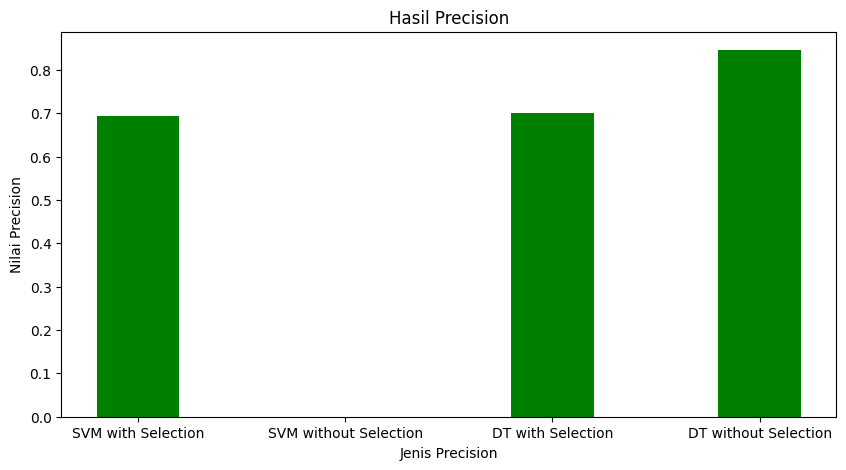

In [ ]:
#Membandingkan ketiga Precision
data = {'SVM with Selection':precision_svm1, 'SVM without Selection':precision_svm2, 'DT with Selection':precision_dt1,
        'DT without Selection': precision_dt2}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.4)

plt.xlabel("Jenis Precision")
plt.ylabel("Nilai Precision")
plt.title("Hasil Precision")
plt.show()

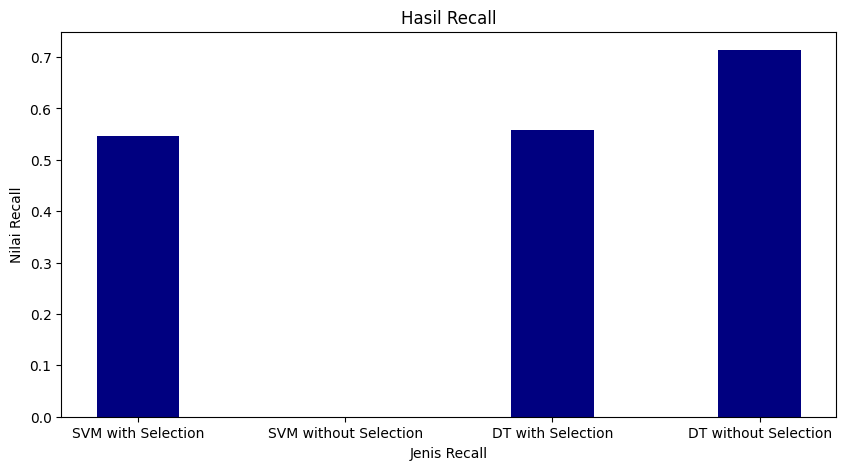

In [ ]:
#Membandingkan ketiga Recall
data = {'SVM with Selection':recall_svm1, 'SVM without Selection':recall_svm2, 'DT with Selection':recall_dt1,
        'DT without Selection': recall_dt2}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='navy',
        width = 0.4)

plt.xlabel("Jenis Recall")
plt.ylabel("Nilai Recall")
plt.title("Hasil Recall")
plt.show()

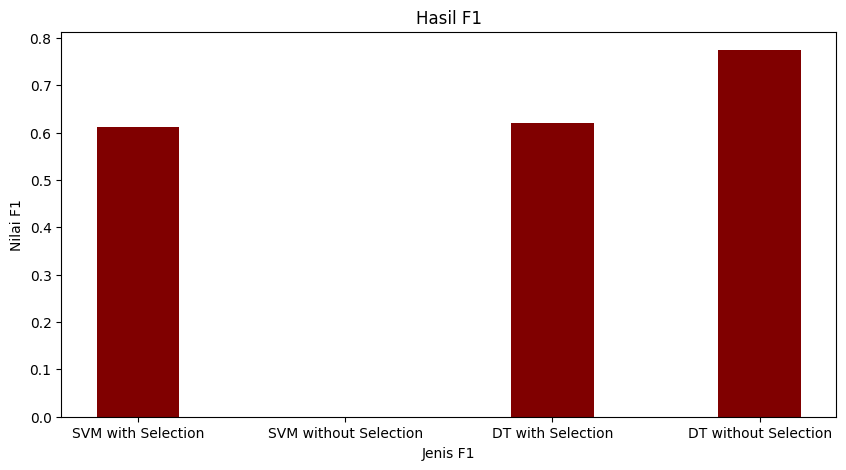

In [ ]:
#Membandingkan ketiga F1-Score
data = {'SVM with Selection':f1_svm1, 'SVM without Selection':f1_svm2, 'DT with Selection':f1_dt1,
        'DT without Selection': f1_dt2}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)

plt.xlabel("Jenis F1")
plt.ylabel("Nilai F1")
plt.title("Hasil F1")
plt.show()

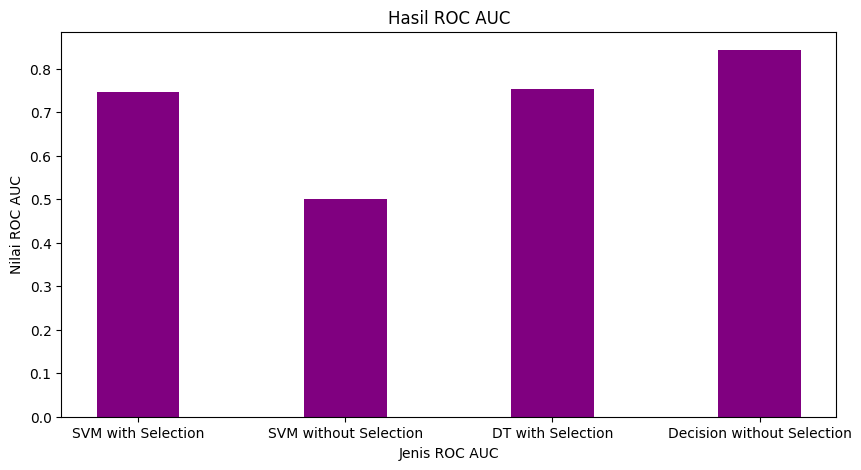

In [ ]:
#Membandingkan ketiga ROC-AUC
data = {'SVM with Selection':roc_auc_svm1, 'SVM without Selection':roc_auc_svm2, 'DT with Selection':roc_auc_dt1,
        'Decision without Selection': roc_auc_dt2}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='purple',
        width = 0.4)

plt.xlabel("Jenis ROC AUC")
plt.ylabel("Nilai ROC AUC")
plt.title("Hasil ROC AUC")
plt.show()

##Unsupervised

###Segmentasi Pelanggan

Mengelompokkan pelanggan berdasarkan usia, pekerjaan, status pernikahan, dan tingkat pendidikan untuk memahami segmen pasar yang berbeda.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-86-8ede3561978e>:25: UserWarning: The markers list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(x='age', y='job', hue='cluster', data=data_subset, palette='Set1', style='marital', markers=['o', 's', 'D', '^'])


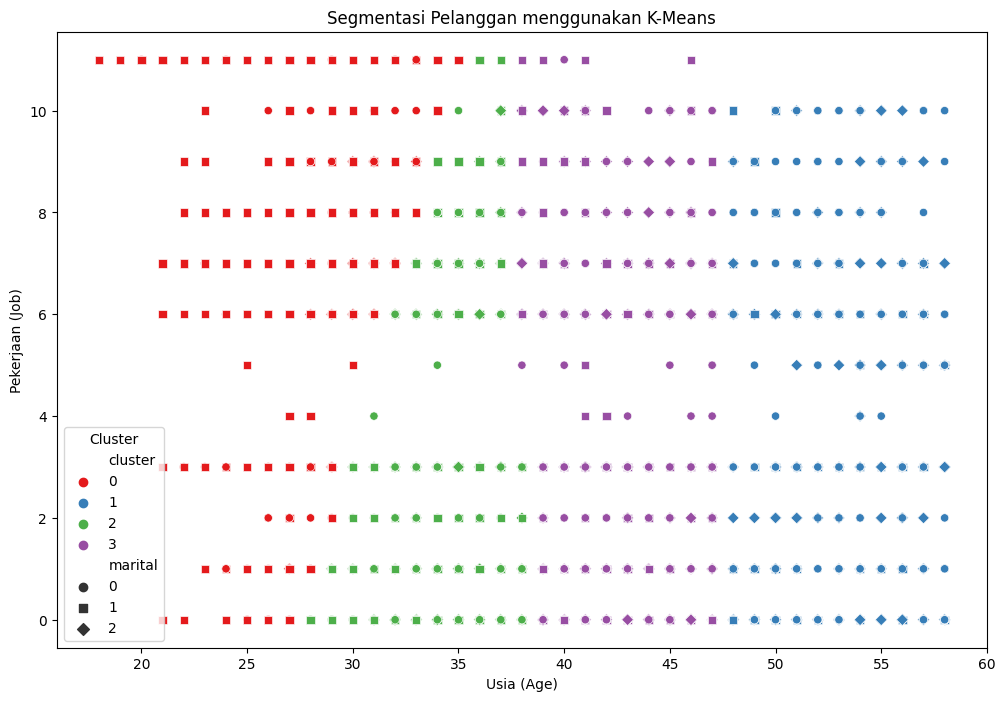

In [ ]:
# Pemilihan fitur
features = ['age', 'job', 'marital', 'education']

# Mengambil subset data dengan fitur yang dipilih
data_subset = data_cleaned[features].copy()

# Konversi fitur kategorikal menjadi numerik
label_encoder = LabelEncoder()
data_subset['job'] = label_encoder.fit_transform(data_subset['job'])
data_subset['marital'] = label_encoder.fit_transform(data_subset['marital'])
data_subset['education'] = label_encoder.fit_transform(data_subset['education'])

# Menentukan jumlah clusters
k = 4

# Penerapan K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_subset)

# Menambahkan label cluster ke dalam dataset
data_subset['cluster'] = kmeans.labels_

# Visualisasi scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='job', hue='cluster', data=data_subset, palette='Set1', style='marital', markers=['o', 's', 'D', '^'])
plt.title('Segmentasi Pelanggan menggunakan K-Means')
plt.xlabel('Usia (Age)')
plt.ylabel('Pekerjaan (Job)')
plt.legend(title='Cluster')
plt.show()

Kami memiliki 4 cluster dimana ada cluster merah, hijau, ungu, dan biru.
* Cluster Merah memberikan pengetahuan bahwa usia yang masuk dalam cluster tersebut adalah dari umur 20 sampai dengan 35 tahun. Lalu memang di umur tersebut dari segi pekerjaan nya paling banyak adalah Pelajar(12) dan admin(7), dan paling banyak Belum Menikah (Single)
* Cluster Hijau memberikan pengetahuan bahwa usia yang masuk dalam cluster tersebut adalah dari umur 28 sampai dengan 39 tahun. Lalu di umur tersebut yang paling banyak pekerjaannya adalah management(0) dan technician(1), dan paling banyak sudah menikah (married).
* Cluster Ungu memberikan pengetahuan bahwa usia yang masuk dalam cluster tersebut adalah dari umur 39 sampai dengan 47 tahun. Lalu di umur tersebut kebanyakan mengambil pekerjaan sebagai admin, services, self employed, unemployed lalu kebanyakan sudah menikah (married)
* Cluster Biru memberikan pengetahuan bahwa usia yang masuk dalam cluster tersebut adalah dari umur 48 sampai dengan 58. Lalu di umur tersebut kebanyakan mengambil pekerjaan sebagai management, technician, entrepreneur, blue-collar, admin, services, unemployed, dan sudah menikah (married)
